In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

base_dir = "./CTCI/Panorama CTCI/Diseño/Gráficos/Desempeño"

Mounted at /content/drive


In [2]:
# This cell set up all the required styling

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.patches import FancyBboxPatch

MAIN_COLOR = "#37539C"

BLUE_PALETTE = [
    "#869CD4",
    "#4969BE",
    "#4062BB",
    "#354F95",
    "#2D4175",
    "#27355A"
]

COLOR_PALETTE = [
    MAIN_COLOR,
    "#59C3C3",
    "#F45B69",
    "#52489C",
    "#9FB7B9",
    "#EBEBEB",
    "#4062BB",
    "#46B1C9",
    "#84C0C6",
    "#BCC1BA",
    "#F2E2D2"
]

def install_open_sans():
  """Install Open Sans fonts from directory, and set them as the default
  """
  fonts_dir = "./CTCI/Panorama CTCI/Diseño/open_sans_fonts"
  for font_path in os.listdir(fonts_dir):
    full_path = os.path.join(fonts_dir, font_path)
    fontManager.addfont(full_path)

def set_properties(font_family, main_color, color_palette):
  # Set font
  mpl.rc('font', family=font_family)
  # Set font weight to bold in everything
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["axes.titleweight"] = "bold"
  mpl.rcParams["axes.labelweight"] = "bold"

  # Set color of text, labels and ticks
  mpl.rcParams['text.color'] = main_color
  mpl.rcParams['axes.labelcolor'] = main_color
  mpl.rcParams['xtick.color'] = main_color
  mpl.rcParams['ytick.color'] = main_color

  # Set default colormap
  mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_palette)

  # Set thant only left and bottom plot spines should be visible
  # (instead of a whole square around the plot)
  mpl.rcParams['axes.spines.left'] = True
  mpl.rcParams['axes.spines.bottom'] = True
  mpl.rcParams['axes.spines.right'] = False
  mpl.rcParams['axes.spines.top'] = False

  # Set horizontal grid
  mpl.rcParams["axes.grid"] = True
  mpl.rcParams["axes.grid.axis"] = "y"
  mpl.rcParams["grid.linestyle"] = "--"

  # Set default linestyle and marker
  mpl.rcParams["lines.linestyle"] = "-"
  mpl.rcParams["lines.marker"] = "o"

  # Set default DPI for image saving (300 is the mininum recommended for printing)
  mpl.rcParams['savefig.dpi'] = 300


install_open_sans()
set_properties("Open Sans", MAIN_COLOR, COLOR_PALETTE)


def round_corners(ax):
  new_patches = []
  old_bottom, old_top = ax.get_ylim()
  for patch in reversed(ax.patches):
      bb = patch.get_bbox()
      if bb.height == 0:
        new_patches.append(patch)
        continue
      color=patch.get_facecolor()
      p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                          abs(bb.width), abs(bb.height),
                          boxstyle="round,pad=-0.0040,rounding_size=0.1",
                          ec="none", fc=color,
                          mutation_aspect=4
                          )
      patch.remove()
      new_patches.append(p_bbox)
  for patch in new_patches:
      ax.add_patch(patch)

  # Fix ylim
  ax.set_ylim(old_bottom, old_top)
plt.rcParams['axes.axisbelow'] = True

## Formación de capital humano

### Matrículas anuales de universidades en Chile

In [3]:
filename1 = "Evolucion matricula1.xlsx"
filename2 = "Evolucion matricula2.xlsx"

# Excel sector económico
excel1 = pd.read_excel(os.path.join(base_dir, filename1)) # Cargar datos
excel2 = pd.read_excel(os.path.join(base_dir, filename2)) # Cargar datos

years=list(range(2012,2022))

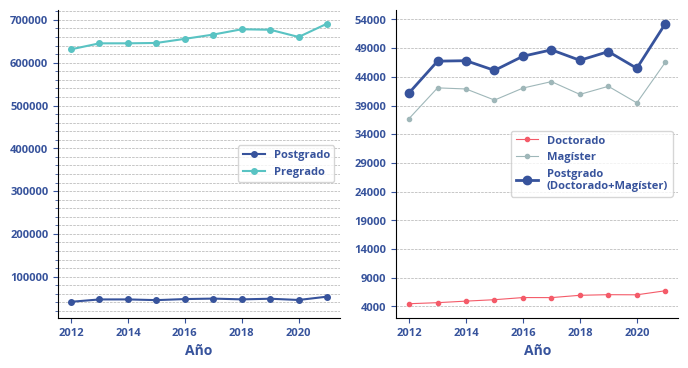

In [4]:

fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].plot(years, excel1.loc[0][6:], '-o', markersize=4, label='Postgrado')
axs[0].plot(years, excel1.loc[1][6:], '-o', markersize=4, label='Pregrado')
axs[0].legend(fontsize=8)
axs[0].grid(which = "major", axis='y', linestyle='--', linewidth=0.5)
axs[0].grid(which = "minor", axis='y', linestyle='--', linewidth=0.5)
axs[0].minorticks_on()
axs[0].tick_params(axis='x', which='minor', bottom=False)
axs[0].set_yticks(np.arange(0, max(excel1.loc[1][6:])+80000, 100000))
axs[0].tick_params(labelsize=8)
axs[0].set_ylim(bottom=4000)
axs[0].set_xlabel('Año')

axs[1].plot(years, excel2.loc[0][6:], '-o', markersize=3, label='Doctorado', c=COLOR_PALETTE[2], linewidth=0.8)
axs[1].plot(years, excel2.loc[1][6:], '-o', markersize=3, label='Magíster', c=COLOR_PALETTE[4], linewidth=0.8)
axs[1].plot(years, excel1.loc[0][6:], '-o', label='Postgrado\n(Doctorado+Magíster)', c=COLOR_PALETTE[0], linewidth=2)
axs[1].legend(fontsize=8)
axs[1].grid(which = "major", axis='y', linestyle='--', linewidth=0.5)
axs[1].set_yticks(np.arange(4000, max(excel1.loc[0][6:])+5000, 5000))
axs[1].tick_params(labelsize=8)
axs[1].set_xlabel('Año')

#fig.suptitle('Cantidad de matrículas anuales\nen universidades de Chile', fontsize=10)
plt.savefig(base_dir+'/matriculas_anuales.png')
plt.savefig(base_dir+'/matriculas_anuales.svg')
plt.show()

### Evolución matricula de educación superior segun genero
1a 2a y 3a radiografía de género. Datos obtenidos de archivo "evol_matriculas.xlsx"


In [5]:
colors = ["#869CD4", "#778FCE", "#6882C7", "#5976C0", "#4A69B9", "#4360AA", "#3E579A", "#384F8A",
          "#33467A", "#2D3E6A", "#27355A"]

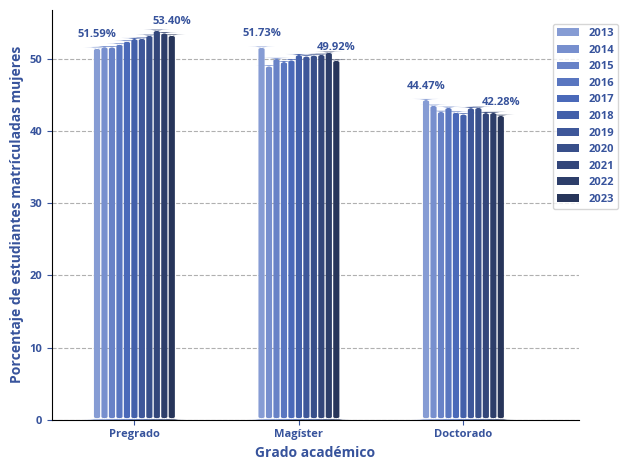

In [6]:
from matplotlib import cm
#color = cm.inferno_r(np.linspace(.1, .2, 11))

years = list(range(2013,2024))
pregrado = [51.5942, 51.7855, 51.7691, 52.1606, 52.5765, 52.9155, 52.9699, 53.37464, 54.0703, 53.7086,  53.3964]
magister = [51.7291, 49.1368, 50.1604, 49.7252, 49.9698, 50.6945, 50.5195, 50.6449, 50.7351, 51.0250, 49.9214]
doct = [44.4659, 43.6751, 42.8267, 43.3904, 42.7256, 42.4789, 43.3366, 43.3930, 42.6512, 42.6763, 42.2779]

df = pd.DataFrame({'Pregrado': pregrado, 'Magíster': magister, 'Doctorado': doct}, index=years)
df = df.T
ax = df.plot.bar(y=years, color=colors, rot=0, fontsize=8)
for i in range(len(years)):
  if i == 0 or i==len(years)-1:
    ax.bar_label(ax.containers[i], fmt='%.2f%%',
                 fontsize=8, padding=5)#, padding= -100)#, rotation=45)
ax.set_ylabel('Porcentaje de estudiantes matrículadas mujeres')
ax.set_xlabel('Grado académico')
ax.legend(fontsize=8, bbox_to_anchor=(0.94,0.98))
ax.set_xlim(right=2.7)
ax.grid(False, axis='x')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/matric_ed_sup_por_genero.png')
plt.savefig(base_dir+'/matric_ed_sup_por_genero.svg')
plt.show()

## Porcentaje mujeres que se titularon STEM en educación terciaria con respecto al total de personas con título universitario en países OCDE

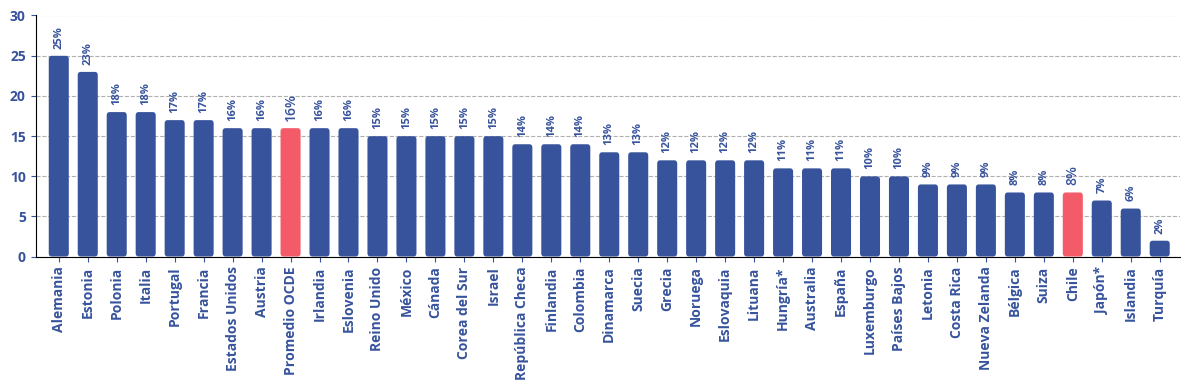

In [7]:
plt.rc('axes', axisbelow=True)
countries = ['Alemania', 'Estonia', 'Polonia', 'Italia', 'Portugal', 'Francia', 'Estados Unidos', 'Austria', 'Promedio OCDE', 'Irlandia',
              'Eslovenia', 'Reino Unido', 'México', 'Cánada', 'Corea del Sur', 'Israel', 'República Checa', 'Finlandia', 'Colombia', 'Dinamarca',
              'Suecia', 'Grecia', 'Noruega', 'Eslovaquia', 'Lituana', 'Hungría*', 'Australia', 'España', 'Luxemburgo', 'Países Bajos',
              'Letonia', 'Costa Rica', 'Nueva Zelanda', 'Bélgica', 'Suiza', 'Chile', 'Japón*', 'Islandia', 'Turquía']
percents = [25, 23, 18, 18, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15,
            14, 14, 14, 13, 13, 12, 12, 12, 12, 11, 11, 11, 10, 10, 9, 9, 9,
            8, 8, 8, 7, 6, 2]
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(countries, percents, width=0.7)
ax.tick_params(axis='x', rotation=90)
barlabels = ax.bar_label(ax.containers[0], fmt='%.0f%%', fontsize=8, rotation=90, padding=5)
ax.set_ylim((0,30))
ax.set_xlim((-0.8,38.7))
ax.get_children()[8].set_color(COLOR_PALETTE[2])
ax.get_children()[35].set_color(COLOR_PALETTE[2])
barlabels[8].set_font_properties({'weight':'semibold'})
barlabels[35].set_font_properties({'weight':'semibold'})
#rects=ax.patches
#for index, rect in enumerate(rects):
#    if index in [8, 35]:
#        height = np.round(rect.get_height(),2)
#        ax.text(rect.get_x() + rect.get_width() / 2, height+0.1, height,
#                ha='center', va='bottom', color=COLOR_PALETTE[2])
ax.grid(axis='y', linestyle='--')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/mujeres_stem_porcentaje.png')
plt.savefig(base_dir+'/mujeres_stem_porcentaje.svg')
plt.show()

### Programas de postgrado en áreas STEM por región de sede

https://www.observa.minciencia.gob.cl/indicadores/formacion-y-capital-humano/porcentaje_matricula_regional_stem

In [8]:
doc_2013=[2,1,7,0,2,17,57,0,4,0,22,4,4,1,0,0]
master_2013=[6,2,18,0,8,35,115,0,6,4,41,11,23,3,0,4]

doc_2022=[2,0,11,1,6,34,81,0,9,3,30,6,3,2,0,2]
master_2022=[2,5,27,3,10,66,173,0,8,4,63,16,16,4,0,4]

df = pd.read_excel(base_dir+'/docs_stem.xlsx', index_col=0)
regs = list(df.index)
years = list(range(2013,2023))

dfs = []
for y in years:
  dfs.append(pd.DataFrame({'Magíster': df['Mag_{}'.format(y)], 'Doctorado':df['Doc_{}'.format(y)]}, index=regs))

In [9]:
#from colour import Color
#red = Color("#869CD4")
#colors = list(red.range_to(Color("#27355A"),11))

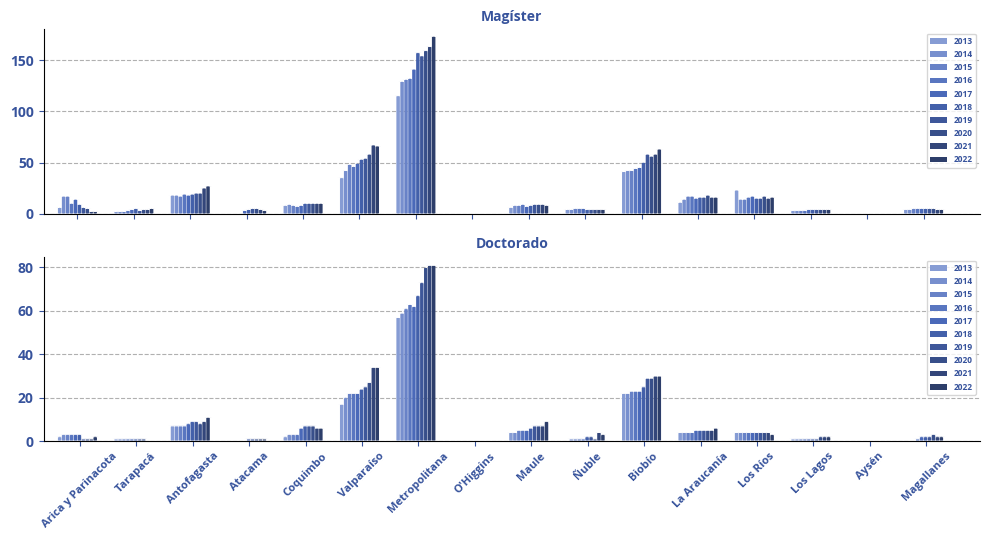

In [10]:
from matplotlib import cm
#plt.rc('axes', axisbelow=True)
color1 = cm.Blues_r(np.linspace(.4, .1, 10))
color2 = cm.inferno_r(np.linspace(.1, .4, 10))

years = list(range(2013,2023))
df1 = pd.DataFrame(data=[i['Magíster'].values for i in dfs], columns=dfs[0].index, index=years)
df2 = pd.DataFrame(data=[i['Doctorado'].values for i in dfs], columns=dfs[0].index, index=years)
df1=df1.T
df2=df2.T

fig, axs = plt.subplots(2,1,figsize=(10,5.5))
axs_df1 = df1.plot.bar(y=df1.columns, ax=axs[0], legend=False, color=colors, width=0.7)
axs_df2 = df2.plot.bar(y=df2.columns, ax=axs[1], legend=False, color=colors, width=0.7)
axs[0].set_ylim((0,180))
axs[1].set_ylim((0,85))
axs[0].set_title('Magíster', fontsize=10)
axs[1].set_title('Doctorado', fontsize=10)

axs[0].set_xticklabels([])
plt.subplots_adjust(hspace=0.05)
axs[0].grid(axis='y', linestyle='--')
axs[1].grid(axis='y', linestyle='--')
axs[0].grid(False, axis='x')
axs[1].grid(False, axis='x')
plt.rc('axes', axisbelow=True)
axs[0].set_xlim(right=16)
axs[1].set_xlim(right=16)
axs[1].set_xticks((np.arange(0, 2 * 16, 2) + 1 / float(10 + 1)) / 2.)
axs[1].set_xticklabels(df.index, rotation = 45, fontsize=8)
axs[0].legend(fontsize=6)
axs[1].legend(fontsize=6)
round_corners(axs[0])
round_corners(axs[1])
plt.tight_layout()
plt.savefig(base_dir + '/postgrado_stem_region_sep.svg')
plt.savefig(base_dir + '/postgrado_stem_region_sep.png')
plt.show()

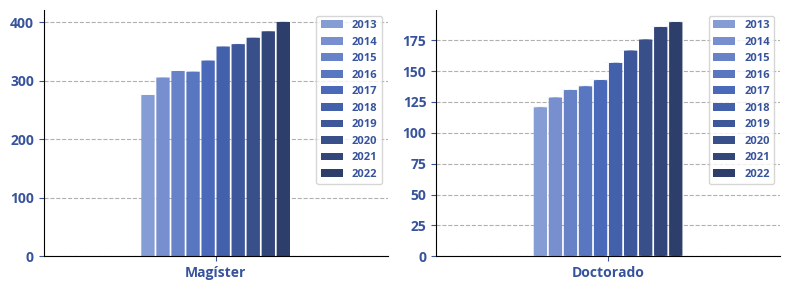

In [11]:
df1_sum = []
for y in years:
  df1_sum.append(df1[y].sum())

df2_sum = []
for y in years:
  df2_sum.append(df2[y].sum())

df1_sum = pd.DataFrame(df1_sum, columns=['Total'], index=years).T
df2_sum = pd.DataFrame(df2_sum, columns=['Total'], index=years).T

fig, axs = plt.subplots(1,2,figsize=(8,3))
axs_df1 = df1_sum.plot.bar(y=df1_sum.columns, ax=axs[0], legend=True, color=colors, width=0.7,
                           rot=0)
axs_df2 = df2_sum.plot.bar(y=df2_sum.columns, ax=axs[1], legend=True, color=colors, width=0.7,
                           rot=0)
axs_df1.grid(axis='y', linestyle='--')
axs_df2.grid(axis='y', linestyle='--')
axs_df1.set_xlim((-0.8,0.8))
axs_df1.legend(fontsize=8)
axs_df2.set_xlim((-0.8, 0.8))
axs_df2.legend(fontsize=8)
axs_df1.set_xticklabels(['Magíster'])
axs_df2.set_xticklabels(['Doctorado'])
axs[0].grid(False, axis='x')
axs[1].grid(False, axis='x')
round_corners(axs[0])
round_corners(axs[1])
plt.tight_layout()
plt.savefig(base_dir+'/total_postgrado_stem.png')
plt.savefig(base_dir+'/total_postgrado_stem.svg')
plt.show()

### Personas graduadas de becas ANID de postgrado en CHile y extranjero

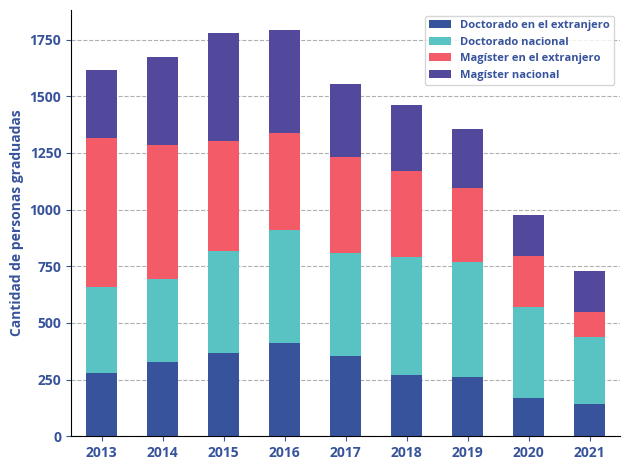

In [12]:
df = pd.read_excel(base_dir+'/becas_postgrado_chile_extranjero.xlsx', index_col=0).T
fig, ax = plt.subplots()
df.plot.bar(stacked=True, ax=ax, rot=0)
ax.legend(fontsize=8)
ax.set_ylabel('Cantidad de personas graduadas')
ax.grid(False, axis='x')
plt.tight_layout()
plt.savefig(base_dir+'/becas_postgrado_chile_extranjero.png')
plt.savefig(base_dir+'/becas_postgrado_chile_extranjero.svg')
plt.show()

### Evolución de las personas graduadas de becas de postgrado en Chile y en el extranjero según área de conocimiento
https://anid.cl/capital-humano/magister-nacional/

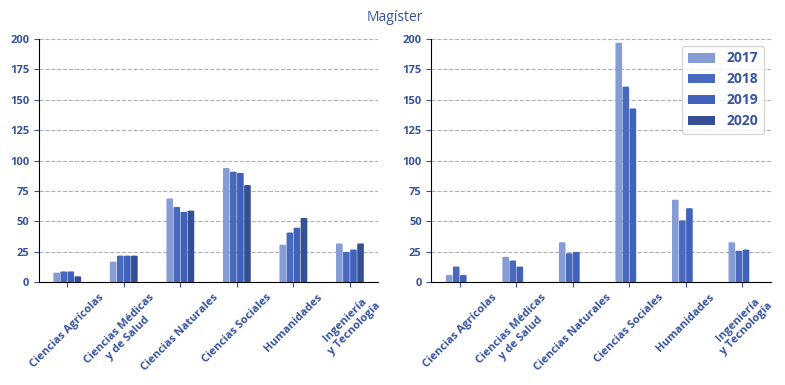

In [13]:
area = ['Ciencias Agrícolas', 'Ciencias Médicas\ny de Salud', 'Ciencias Naturales',
        'Ciencias Sociales', 'Humanidades', 'Ingeniería\ny Tecnología']
years = list(range(2017, 2021))

df_mag_nac = pd.DataFrame([[8, 17, 69, 94, 31, 32], [9, 22, 62, 91, 41, 25],
                           [9, 22, 58, 90, 45, 27], [5, 22, 59, 80, 53, 32]],
                          columns=area, index=years).T
df_mag_ext = pd.DataFrame([[6, 21, 33, 197, 68, 33], [13, 18, 24, 161, 51, 26],
                           [6, 13, 25, 143, 61, 27], [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]],
                          columns=area, index=years).T

color = cm.Blues_r(np.linspace(0.7, 0, 4))
colors = [BLUE_PALETTE[0], BLUE_PALETTE[1], BLUE_PALETTE[2], BLUE_PALETTE[3]]
fig, ax = plt.subplots(1,2, figsize=(8,4))
df_mag_nac.plot.bar(rot=45, ax=ax[0], legend=False, color=colors)
ax[0].tick_params(labelsize=8)
ax[0].set_ylim((0,200))
ax[0].grid(axis='y', linestyle='--')

color = cm.Blues_r(np.linspace(0.7, 0, 4))
df_mag_ext.plot.bar(rot=45, ax=ax[1], color=colors)
ax[1].tick_params(labelsize=8)
ax[1].set_ylim((0,200))
ax[0].grid(False, axis='x')
ax[1].grid(False, axis='x')
round_corners(ax[0])
round_corners(ax[1])
ax[1].grid(axis='y', linestyle='--')
fig.suptitle('Magíster',
             fontsize=10, y=0.95)
plt.tight_layout()
plt.savefig(base_dir+'/becas_mag_area_conoc.png')
plt.savefig(base_dir+'/becas_mag_area_conoc.svg')
plt.show()

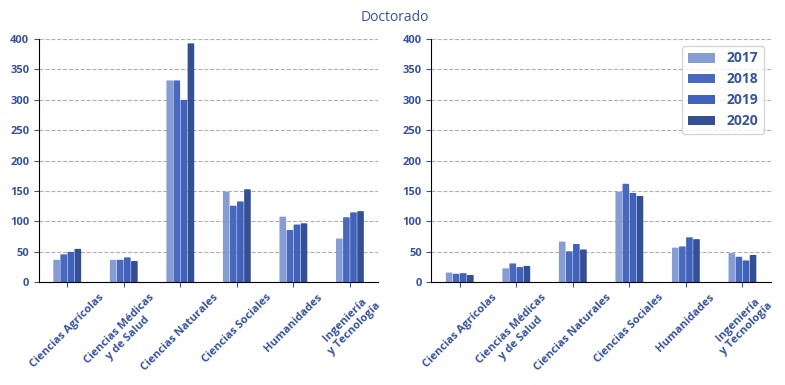

In [14]:
df_doc_nac = pd.DataFrame([[37, 37, 332, 149, 108, 72], [46, 37, 332, 126, 86, 107],
                           [50, 41, 300, 133, 95, 115], [55, 35, 393, 153, 97, 117]],
                          columns=area, index=years).T
df_doc_ext = pd.DataFrame([[16, 23, 67, 149, 57, 48], [14, 31, 51, 162, 59, 42],
                           [15, 25, 63, 147, 74, 36], [12, 27, 54, 142, 71, 45]],
                          columns=area, index=years).T

color = cm.Oranges_r(np.linspace(0.7, 0, 4))
fig, ax = plt.subplots(1,2, figsize=(8,4))
df_doc_nac.plot.bar(rot=45, ax=ax[0], legend=False, color=colors)
ax[0].tick_params(labelsize=8)
ax[0].set_ylim((0,400))
ax[0].grid(axis='y', linestyle='--')

color = cm.Oranges_r(np.linspace(0.7, 0, 4))
df_doc_ext.plot.bar(rot=45, ax=ax[1], color=colors)
ax[1].tick_params(labelsize=8)
ax[1].set_ylim((0,400))
ax[1].grid(axis='y', linestyle='--')
ax[0].grid(False, axis='x')
ax[1].grid(False, axis='x')
round_corners(ax[0])
round_corners(ax[1])
fig.suptitle('Doctorado',
             fontsize=10, y=0.95)
plt.tight_layout()
plt.savefig(base_dir+'/becas_doc_area_conoc.png')
plt.savefig(base_dir+'/becas_doc_area_conoc.svg')
plt.show()

### Porcentaje de mujeres graduadas de becas de postgrado

In [15]:
### PENDIENTE N°2
df = pd.read_excel(base_dir + '/mujeres_grad_becas_postgrado.xlsx', index_col=0).T
df.head()

,Doctorado nacional,Doctorado en el extranjero,Magíster nacional,Magíster en el extranjero
2013,49.3,38.0,46.3,52.5
2014,44.2,40.7,52.5,49.3
2015,44.9,40.0,49.0,50.9
2016,41.9,40.2,45.8,50.5
2017,48.6,40.0,46.1,54.0


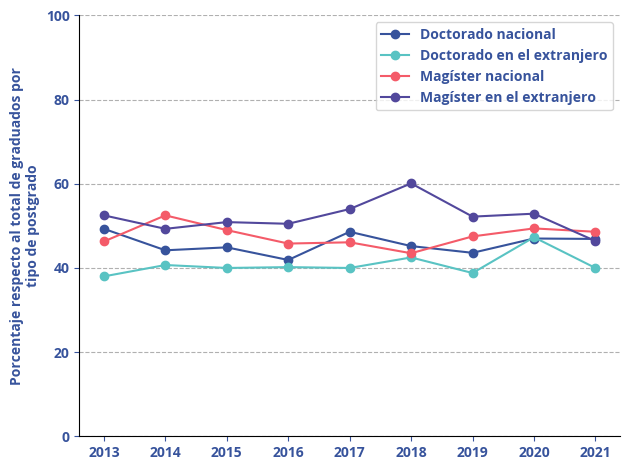

In [16]:
ax = df.plot.line()
ax.set_ylim((0,100))
ax.grid(False, axis='x')
ax.set_ylabel('Porcentaje respecto al total de graduados por\ntipo de postgrado')
plt.tight_layout()
plt.savefig(base_dir + '/mujeres_grad_becas_postgrado.png')
plt.savefig(base_dir + '/mujeres_grad_becas_postgrado.svg')

### Distribución de profesionales con grado de doctor en Chile por género según año de egreso del doctorado

In [66]:
df = pd.read_excel(base_dir + '/doctorados_genero.xlsx', index_col=0).T
df.head()

,Femenino,Masculino,Otro
Antes del 1995,22.11,77.28,0.61
1995-1999,25.93,74.07,NaN
2000-2004,26.99,73.01,NaN
2005-2009,34.56,65.44,NaN
2010-2014,39.28,60.57,0.15


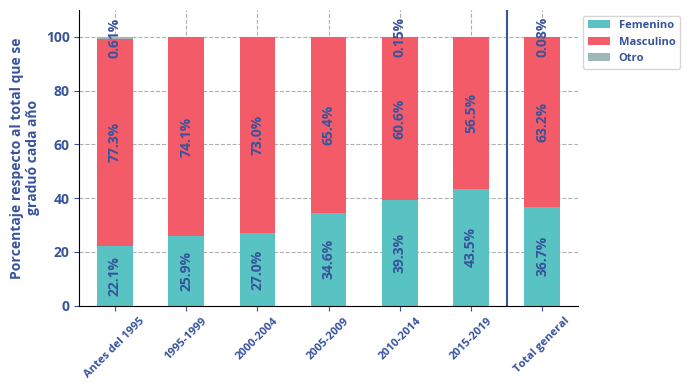

In [68]:
fig, ax = plt.subplots(figsize=(7,4))
df.plot.bar(stacked=True, ax =ax, rot=45, color=[COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[4]])
ax.legend(fontsize=8, bbox_to_anchor=(1,1))
ax.bar_label(ax.containers[0], label_type='center', rotation=90, fmt='%.1f%%')
ax.bar_label(ax.containers[1], label_type='center', rotation=90, fmt='%.1f%%')
ax.bar_label(ax.containers[2], labels= [str(np.round(v,2))+'%' if v>0 else '' for v in ax.containers[2].datavalues], label_type='center', rotation=90)#, fmt='%.1f%%')
ax.set_ylim((0,110))
ax.tick_params(axis='x', labelsize=8)
ax.grid(axis='y', linestyle='--')
ax.axvline(5.5, markersize=0.1)
ax.set_ylabel('Porcentaje respecto al total que se\ngraduó cada año')
plt.tight_layout()
plt.savefig(base_dir+'/doctores_egresados_genero.png')
plt.savefig(base_dir+'/doctores_egresados_genero.svg')

### distribución de profesionales con doctorado por área de conocimiento de sus estudio

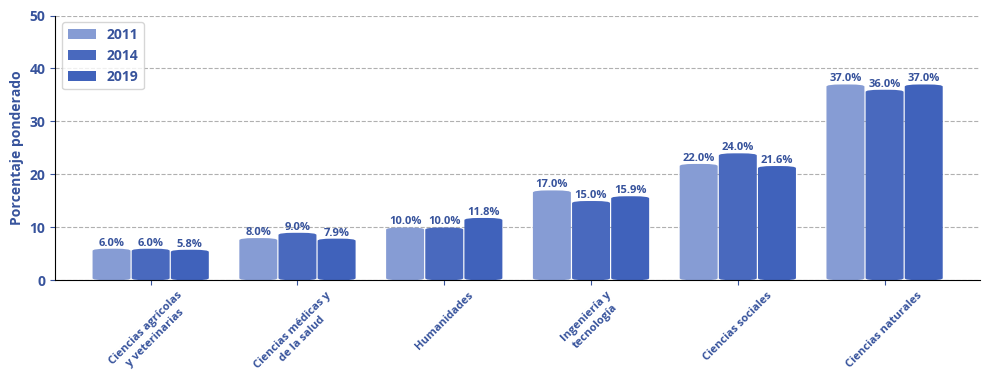

In [19]:
from matplotlib import cm
#plt.rc('axes', axisbelow=True)
color = cm.Blues_r(np.linspace(.4, .1, 3))

df = pd.DataFrame({'Ciencias agrícolas\ny veterinarias':[6, 6, 5.8], 'Ciencias médicas y\nde la salud':[8, 9, 7.9], 'Humanidades':[10, 10, 11.8],
                   'Ingeniería y\ntecnología':[17, 15, 15.9], 'Ciencias sociales':[22, 24, 21.6], 'Ciencias naturales':[37, 36, 37]},
                  index=[2011, 2014, 2019]).T
fig, ax = plt.subplots(figsize=(10,4))
df.plot.bar(rot=45, ax=ax, color=[BLUE_PALETTE[0], BLUE_PALETTE[1], BLUE_PALETTE[2]], width=0.8)
ax.tick_params(axis='x', labelsize=8)
ax.set_ylabel('Porcentaje ponderado')
ax.bar_label(ax.containers[0], fontsize=8, fmt='%.1f%%')
ax.bar_label(ax.containers[1], fontsize=8, fmt='%.1f%%')
ax.bar_label(ax.containers[2], fontsize=8, fmt='%.1f%%')
ax.set_ylim(top=50)
ax.legend(loc=2)
ax.grid(False, axis='x')
round_corners(ax)
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig(base_dir+'/doctorado_por_area_conocimiento.png')
plt.savefig(base_dir+'/doctorado_por_area_conocimiento.svg')
plt.show()

### personas con doctorado trabajando por cada mil trabajadores en la región

In [20]:
df = pd.read_excel(base_dir + '/docs_por_mil_region.xlsx').T
df = df.rename(index={'Magallanes y la Antártica Chilena': 'Magallanes y la\nAntártica Chilena'})
df.head()

,0
Arica y Parinacota,1.5
Tarapacá,0.6
Antofagasta,1.3
Atacama,0.7
Coquimbo,0.9


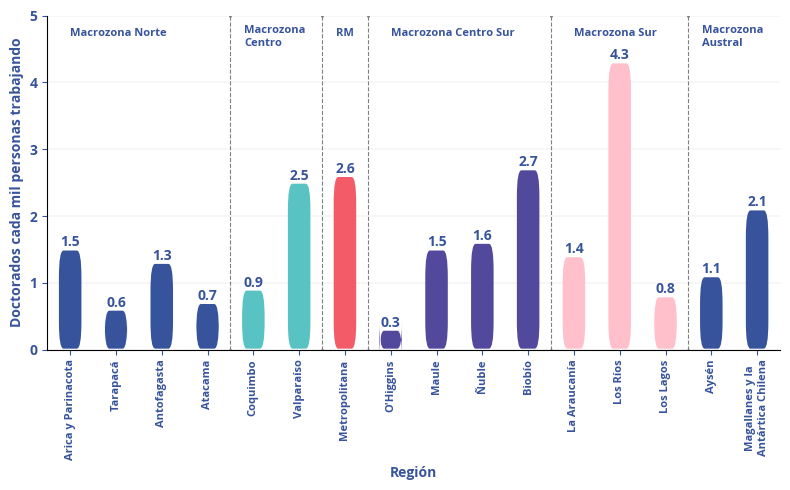

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
df.plot.bar(legend=False, ax=ax)
values = [1.5, 0.6, 1.3, 0.7, 0.9]
ax.set_ylabel('Doctorados cada mil personas trabajando')
ax.set_xlabel('Región')
for i in [0, 1, 2, 3]:
  ax.get_children()[i].set_color(COLOR_PALETTE[0])
for i in [4, 5]:
  ax.get_children()[i].set_color(COLOR_PALETTE[1])
for i in [6]:
  ax.get_children()[i].set_color(COLOR_PALETTE[2])
for i in [7, 8, 9, 10]:
  ax.get_children()[i].set_color(COLOR_PALETTE[3])
for i in [11, 12, 13]:
  ax.get_children()[i].set_color('pink')
ax.tick_params(axis='x', labelsize=8)
ax.axvline(3.5, linestyle='--', color='gray', linewidth=0.8, markersize=1)
ax.axvline(5.5, linestyle='--', color='gray', linewidth=0.8, markersize=1)
ax.axvline(6.5, linestyle='--', color='gray', linewidth=0.8, markersize=1)
ax.axvline(10.5, linestyle='--', color='gray', linewidth=0.8, markersize=1)
ax.axvline(13.5, linestyle='--', color='gray', linewidth=0.8, markersize=1)
ax.grid(axis='y', linewidth=0.2)
ax.grid(False, axis='x')
ax.set_ylim(top=5)
ax.annotate('Macrozona Norte', (0,4.7), fontsize=8)
ax.annotate('Macrozona\nCentro', (3.8,4.55), fontsize=8)
ax.annotate('RM', (5.8,4.7), fontsize=8)
ax.annotate('Macrozona Centro Sur', (7,4.7), fontsize=8)
ax.annotate('Macrozona Sur', (11,4.7), fontsize=8)
ax.annotate('Macrozona\nAustral', (13.8,4.55), fontsize=8)
ax.bar_label(ax.containers[0])
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir + '/docs_por_mil_region.png')
plt.savefig(base_dir + '/docs_por_mil_region.svg')
plt.show()

### Índice Global de Innovación

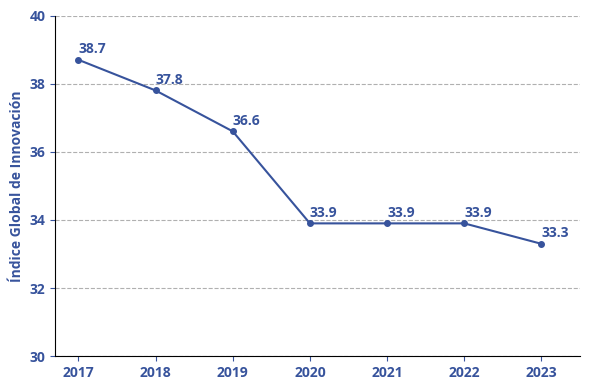

In [22]:
values = [38.7, 37.8, 36.6, 33.9, 33.9, 33.9, 33.3]
x = list(range(2017, 2024))
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, values, '-o', markersize=4)
ax.set_ylim((30, 40))
ax.set_ylabel('Índice Global de Innovación')
ax.grid(axis='y', linestyle='--')
for i in range(len(x)):
  ax.annotate(values[i], (x[i],values[i]+0.2))
ax.set_xlim(right=2023.5)
plt.tight_layout()
plt.savefig(base_dir + '/global_index_chile.png')
plt.savefig(base_dir + '/global_index_chile.svg')

### Índice Global de innovación OCDE y Latinoámerica

In [23]:
df = pd.read_excel(base_dir+'/Indice global innovacional.xlsx', index_col=0)
df

,2017,2018,2019,2020,2021,2022,2023
Argentina,NaN,NaN,NaN,NaN,29.7,28.60,28.0
Alemania,58.4,58.0,58.2,56.5,56.5,56.50,58.8
Australia,51.8,52.0,50.3,48.4,48.4,48.40,49.7
Austria,53.1,51.3,50.9,50.1,50.1,50.10,53.2
Bélgica,49.9,50.5,50.2,49.1,49.1,49.10,49.9
Brasil,NaN,NaN,NaN,NaN,34.2,32.50,33.6
Canadá,53.7,53.0,53.9,52.3,52.3,52.30,53.8
Chile,38.7,37.8,36.6,33.9,33.9,33.90,33.3
Dinamarca,58.7,58.4,58.4,57.5,57.5,57.50,58.7
Eslovaquia,43.4,42.9,42.0,39.7,39.7,39.70,36.2


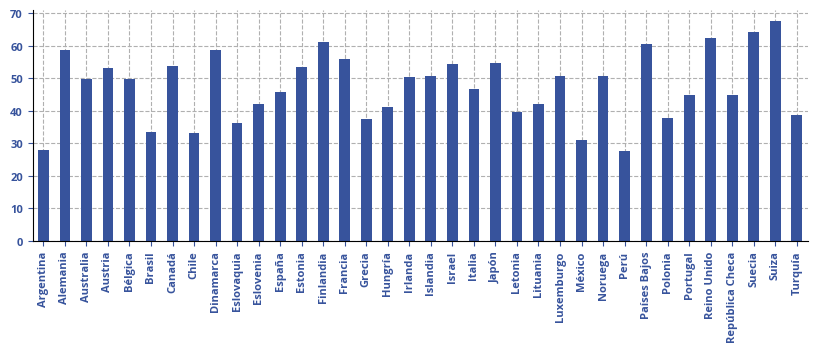

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
df[2023].plot.bar(ax=ax)
ax.grid(axis='y', linestyle='--')
ax.tick_params(labelsize=8)

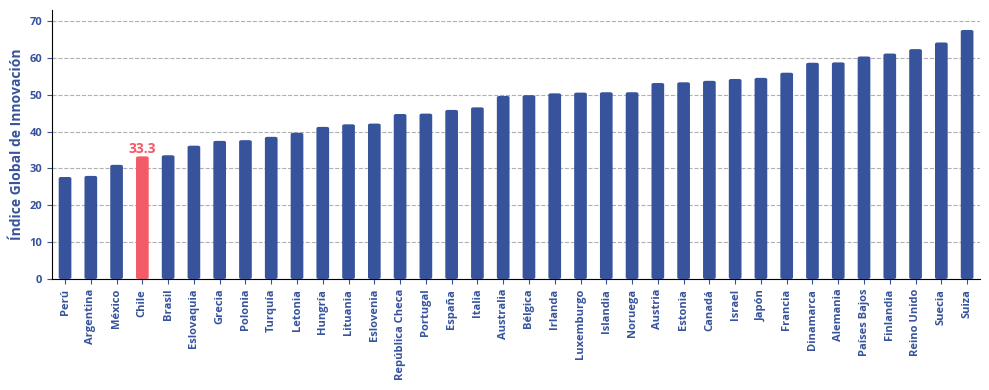

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
df2 = df.sort_values(by=[2023])

df2[2023].plot.bar(ax=ax)
#barlabels = ax.bar_label(ax.containers[0], fontsize=6, rotation=45)
#ax.get_children()[3].set_color(COLOR_PALETTE[2])
##ax.get_children()[35].set_color('r')
#barlabels[3].set_font_properties({'weight':'semibold'})
#barlabels[35].set_font_properties({'weight':'semibold'})

ax.get_children()[3].set_color(COLOR_PALETTE[2])
#ax.get_children()[39].set_color(COLOR_PALETTE[2])
rects = ax.patches
for index, rect in enumerate(rects):
    if index in [3]:#, 39]:
        height = np.round(rect.get_height(),2)
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.2, height,
                ha='center', va='bottom', color=COLOR_PALETTE[2])
round_corners(ax)

ax.grid(axis='y', linestyle='--')
ax.grid(False, axis='x')
ax.set_ylabel('Índice Global de Innovación')
ax.tick_params(labelsize=8)
ax.set_ylim((0, 73))
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/gii_ocde.png')
plt.savefig(base_dir+'/gii_ocde.svg')

### Porcentaje de empresas que innovan según tipo de innovación

In [26]:
df = pd.read_excel(base_dir+'/tipo_innovacion.xlsx', index_col=0)
df.head()

,En producto,En procesos de negocios
Año,,
2013-2014,5.1,14.8
2015-2016,5.8,14.2
2017-2018,4.6,12.6
2019-2020,7.1,15.5


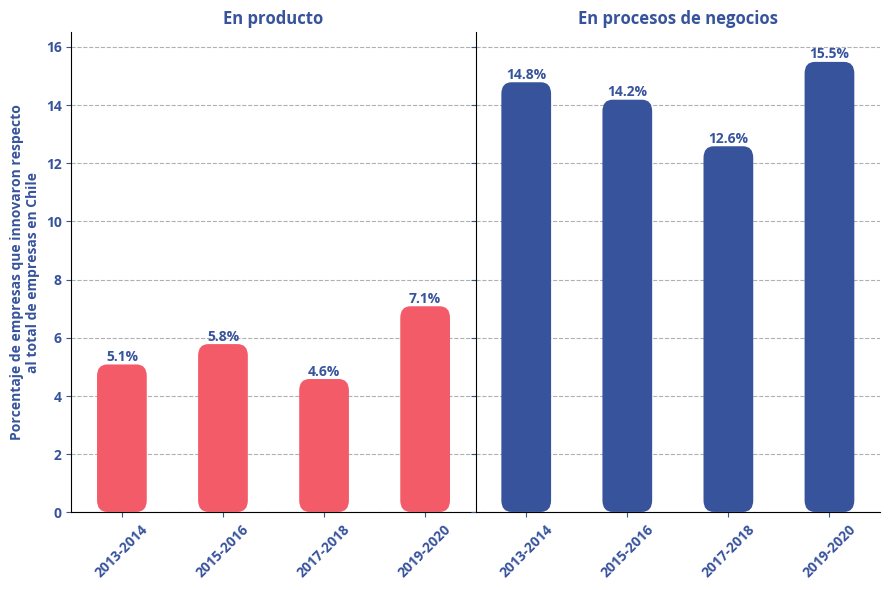

In [27]:
fig, axs = plt.subplots(1,2, figsize=(9,6))
axs[1].set_yticklabels([])
axs[0].set_title('En producto')
axs[1].set_title('En procesos de negocios')
axs[0].set_ylabel('Porcentaje de empresas que innovaron respecto\nal total de empresas en Chile')
df['En producto'].plot.bar(ax=axs[0], color=COLOR_PALETTE[2])
df['En procesos de negocios'].plot.bar(ax=axs[1])
axs[0].set_ylim((0, 16.5))
axs[1].set_ylim((0, 16.5))
axs[0].grid(axis='y', linestyle='--')
axs[1].grid(axis='y', linestyle='--')
axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)
axs[0].bar_label(axs[0].containers[0], fmt='%.1f%%')
axs[1].bar_label(axs[1].containers[0], fmt='%.1f%%')
round_corners(axs[0])
round_corners(axs[1])
axs[0].grid(False, axis='x')
axs[1].grid(False, axis='x')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(base_dir+'/empresas_innovaron_tipo_innovacion.png')
plt.savefig(base_dir+'/empresas_innovaron_tipo_innovacion.svg')
plt.show()

### Gasto total actividades innovativas

In [28]:
excel = pd.read_excel(base_dir+'/gasto_total_activi_innovs.xlsx', index_col=0)
for i in excel.columns:
  excel[i] = excel[i]/10**6
excel.head()

,2017,2018,2019,2020
I+D intramuro,183.293940,249.793835,220.394069,282.175487
I+D extramuro,69.539098,80.811487,57.202169,67.331781
"Adquisición de maquinaria, equipos y software",447.179060,712.066197,455.900067,423.520215
Adquisición de conocimientos,51.812702,54.321376,24.162130,30.958130
Capacitación para la innovación,15.798923,24.114967,25.092894,35.369363


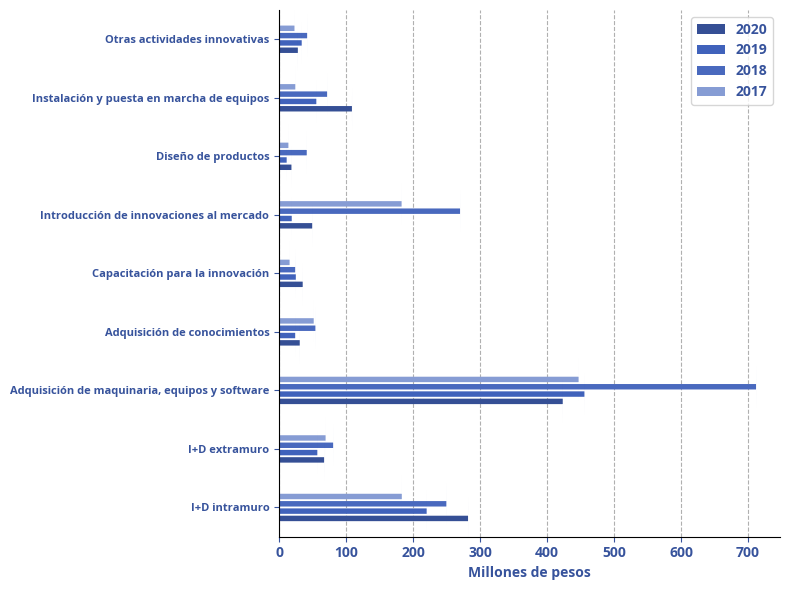

In [29]:
from matplotlib import cm
color = cm.Purples_r(np.linspace(0, 0.7, 4))
ax=excel.plot.barh(y=[2020, 2019, 2018, 2017], color=[BLUE_PALETTE[3], BLUE_PALETTE[2],
                                                        BLUE_PALETTE[1], BLUE_PALETTE[0]], figsize=(8,6))
ax.set_xlabel('Millones de pesos')
ax.tick_params(axis='y', labelsize=8)
round_corners(ax)
ax.grid(False, axis='y')
plt.tight_layout()
plt.savefig(base_dir+'/gasto_activ_innov_actividad.png')
plt.savefig(base_dir+'/gasto_activ_innov_actividad.svg')
plt.show()

### Porcentaje de empresas que coopera en actividades innovativas de las que innova
https://www.observa.minciencia.gob.cl/indicadores/innovacion-y-desarrollo-de-negocios/porcentaje-de-empresas-que-coopera-en-actividades-innovativas-de-las-que-innova

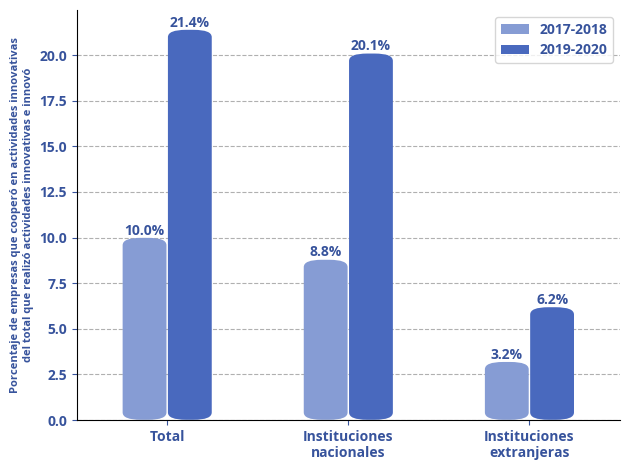

In [30]:
years = ['2017-2018', '2019-2020']
df = pd.DataFrame({'Total':[10.0, 21.4], 'Instituciones\nnacionales':[8.8, 20.1], 'Instituciones\nextranjeras': [3.2, 6.2]}, index=years).T

color = cm.Oranges_r(np.linspace(0.5, 0.2, 2))
ax = df.plot.bar(color=[BLUE_PALETTE[0],BLUE_PALETTE[1]], rot=0)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.bar_label(ax.containers[1], fmt='%.1f%%')
ax.grid(False, axis='x')
round_corners(ax)
plt.ylabel('Porcentaje de empresas que cooperó en actividades innovativas\ndel total que realizó actividades innovativas e innovó',
           fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/cooperacion_innova.png')
plt.savefig(base_dir+'/cooperacion_innova.svg')
plt.show()

### Empresas que innovaron respecto al total de empresas de cada macrozona

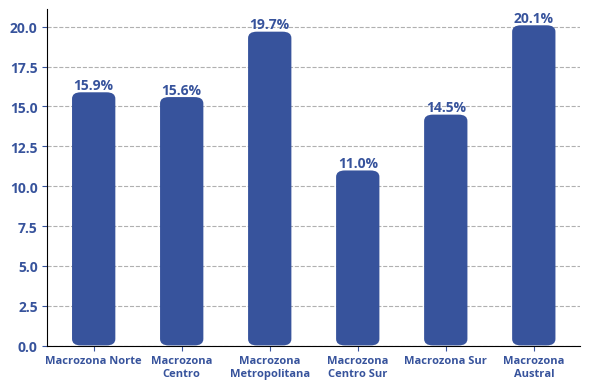

In [31]:
values = [15.9, 15.6, 19.7, 11.0, 14.5, 20.1]
x = ['Macrozona Norte', 'Macrozona\nCentro', 'Macrozona\nMetropolitana', 'Macrozona\nCentro Sur', 'Macrozona Sur', 'Macrozona\nAustral']
fig , ax = plt.subplots(figsize=(6,4))
ax.bar(x, values, width=0.5)
ax.tick_params(axis='x', labelsize=8)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.grid(axis='y', linestyle='--')
ax.grid(False, axis='x')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir + '/empresas_innov_macrozona.png')
plt.savefig(base_dir + '/empresas_innov_macrozona.svg')
plt.show()

### porcentaje de empresas que innovan a nivel internacional

In [32]:
df = pd.read_excel(base_dir+'/empresas_innovan_ocde2.xlsx', index_col=0)
df.head()

,Porcentaje de empresas que innovaron
País,
Alemania,60.8
Australia,57.8
Austria,61.4
Bélgica,59.6
Canadá,79.3


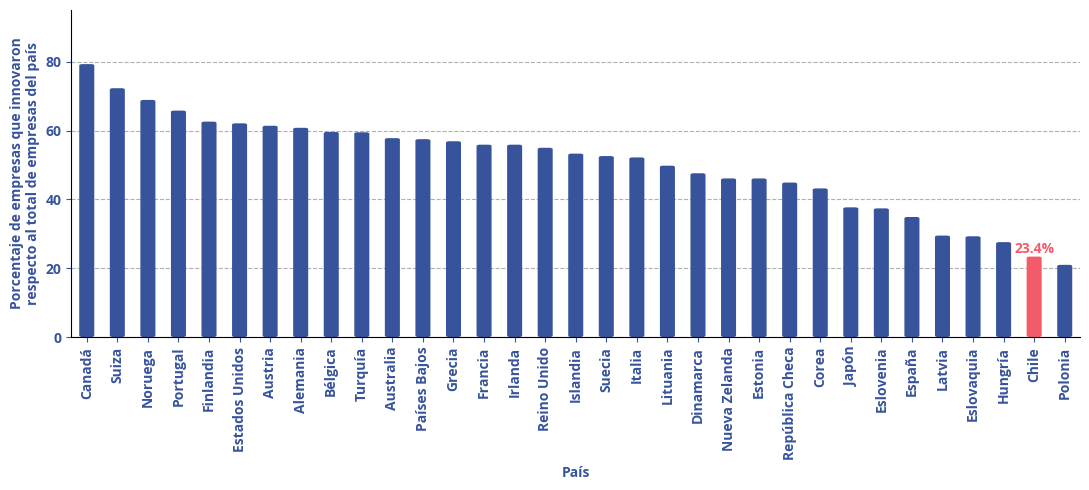

In [33]:
df = df.sort_values(by='Porcentaje de empresas que innovaron', ascending=False)
fig, ax = plt.subplots(figsize=(11,5))
df.plot.bar(legend=False, ax=ax)
ax.get_children()[31].set_color('r')
#barlabels= ax.bar_label(ax.containers[0], fontsize=8, fmt='%.1f%%', rotation=90,
#                        padding=3)
#barlabels[31].set_font_properties({'weight':'semibold'})

ax.get_children()[31].set_color(COLOR_PALETTE[2])
rects = ax.patches
for index, rect in enumerate(rects):
    if index in [31]:#, 39]:
        height = np.round(rect.get_height(),2)
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.2, str(height)+'%',
                ha='center', va='bottom', color=COLOR_PALETTE[2])
round_corners(ax)
ax.set_ylim((0,95))

ax.grid(axis='y', linestyle='--')
ax.set_ylabel('Porcentaje de empresas que innovaron\nrespecto al total de empresas del país')

ax.grid(False, axis='x')
plt.tight_layout()
plt.savefig(base_dir +'/empresas_innov_internacional.png')
plt.savefig(base_dir +'/empresas_innov_internacional.svg')
plt.show()

### Porcentaje de empresas que innovan en productos nuevos para el mercado a nivel internacional


In [69]:
df = pd.read_excel(base_dir + '/empresas_innov_productos_nuevos.xlsx', index_col=0)
df.head()

,Porcentaje de empresas que innovaron en productos nuevos para el mercado
País,
Alemania,10.0
Australia,11.0
Austria,22.7
Bélgica,28.1
Canadá,21.4


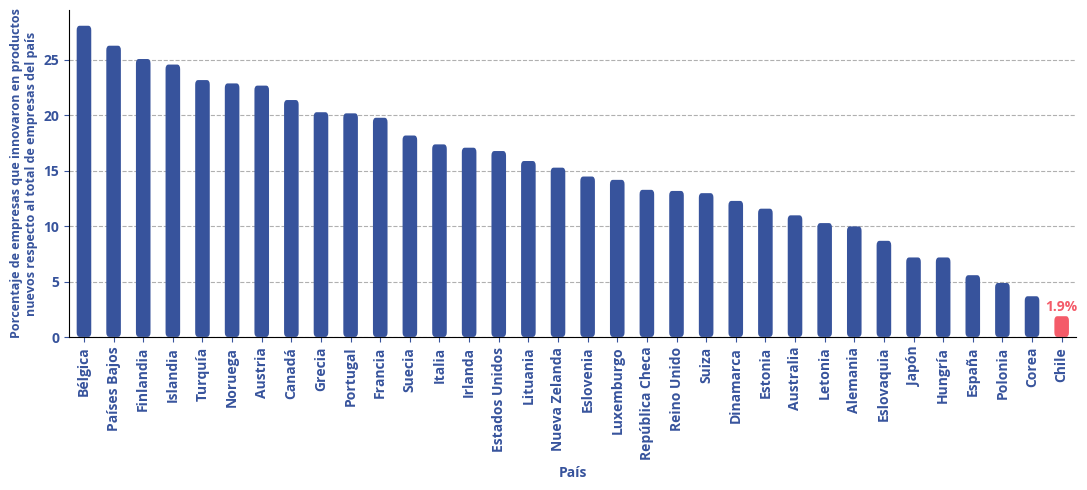

In [70]:
df = df.sort_values(by='Porcentaje de empresas que innovaron en productos nuevos para el mercado',
                    ascending=False)
fig, ax = plt.subplots(figsize=(11,5))
df.plot.bar(legend=False, ax=ax)
ax.get_children()[33].set_color('r')
#barlabels= ax.bar_label(ax.containers[0], fontsize=8, fmt='%.1f%%', rotation=90,
#                        padding=3)

#barlabels[33].set_font_properties({'weight':'semibold'})
#ax.set_ylim((0,33))

ax.get_children()[33].set_color(COLOR_PALETTE[2])
rects = ax.patches
for index, rect in enumerate(rects):
    if index in [33]:#, 39]:
        height = np.round(rect.get_height(),2)
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.2, str(height)+'%',
                ha='center', va='bottom', color=COLOR_PALETTE[2])
round_corners(ax)
ax.grid(axis='y', linestyle='--')
ax.grid(False, axis='x')
ax.set_ylabel('Porcentaje de empresas que innovaron en productos\nnuevos respecto al total de empresas del país', fontsize=9)
plt.tight_layout()
plt.savefig(base_dir +'/empresas_innov_productos_nuevos.png')
plt.savefig(base_dir +'/empresas_innov_productos_nuevos.svg')
plt.show()

## Innovación Pública y Social

### Distribución del puntaje del índice de innovación pública (medición sobre un máx de 100 ptos.)

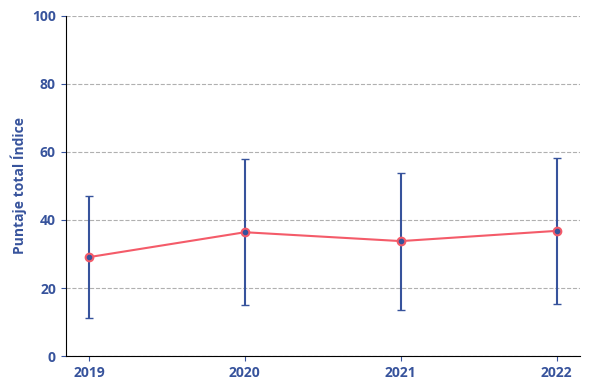

In [36]:
mean = [29.1, 36.4, 33.8, 36.8]
std = [17.9, 21.4, 20.1, 21.4]
years = list(range(2019, 2023))

fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(years,mean,std, fmt='.', capsize=3)
ax.plot(years,mean, color=COLOR_PALETTE[2])
ax.set_ylim((0,100))
ax.set_xticks(years)
ax.set_ylabel('Puntaje total Índice')
plt.tight_layout()
plt.savefig(base_dir+'/ptje_indice_innov_sobre_100.png')
plt.savefig(base_dir+'/ptje_indice_innov_sobre_100.svg')

### Evolución del índice de desempeño de las instituciones

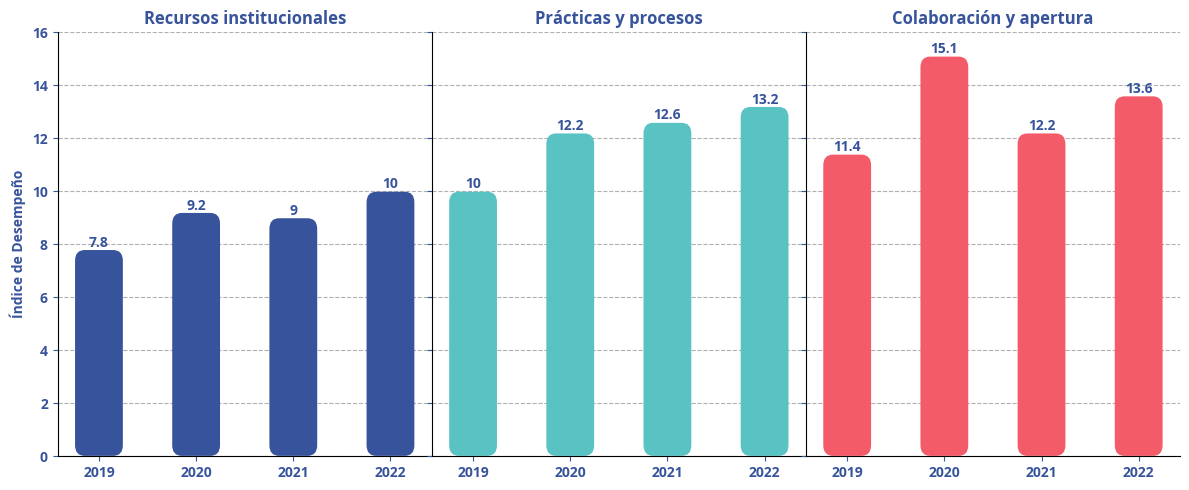

In [37]:
fig, axs = plt.subplots(1,3, figsize=(12,5))
axs[1].set_yticklabels([])
axs[2].set_yticklabels([])
years = list(range(2019, 2023))
recursos_institucionales = [7.8, 9.2, 9.0, 10.0]
practicas_y_procesos = [10.0, 12.2, 12.6, 13.2]
colaboracion_y_apertura = [11.4, 15.1, 12.2, 13.6]
axs[0].bar(years, recursos_institucionales, width=0.5)
axs[1].bar(years, practicas_y_procesos, width=0.5, color=COLOR_PALETTE[1])
axs[2].bar(years, colaboracion_y_apertura, width=0.5, color=COLOR_PALETTE[2])
axs[0].set_title('Recursos institucionales')
axs[1].set_title('Prácticas y procesos')
axs[2].set_title('Colaboración y apertura')
for i in range(3):
  axs[i].set_xticks(years, labels=years)#, fontsize=8)
  axs[i].set_ylim((0,16))
  axs[i].grid(axis='y', linestyle='--')
  axs[i].bar_label(axs[i].containers[0])#, fmt='%.1f%')
  round_corners(axs[i])
axs[0].set_ylabel('Índice de Desempeño')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(base_dir + '/indice_desempeno.png')
plt.savefig(base_dir + '/indice_desempeno.svg')
plt.show()

### Evolución del porcentaje de marudez metodológica de las instituciones

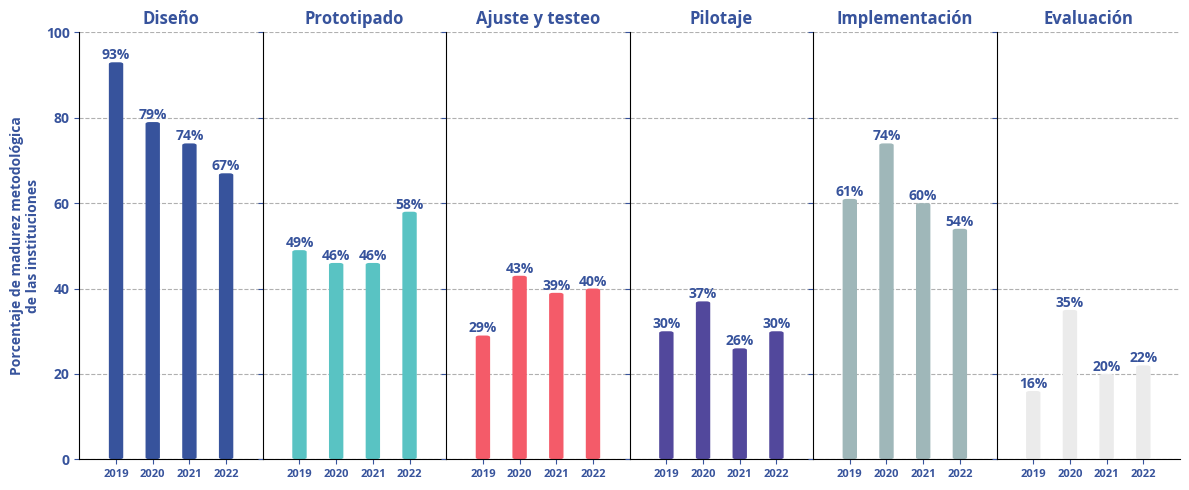

In [38]:
diseno = [93, 79, 74, 67]
prototipado = [49, 46, 46, 58]
ajuste_y_testeo = [29, 43, 39, 40]
pilotaje = [30, 37, 26, 30]
implementacion = [61, 74, 60, 54]
evaluacion = [16, 35, 20, 22]
years = list(range(2019, 2023))

fig, axs = plt.subplots(1,6, figsize=(12,5))
axs[0].bar(years, diseno, width=0.4)
axs[1].bar(years, prototipado, width=0.4, color=COLOR_PALETTE[1])
axs[2].bar(years, ajuste_y_testeo, width=0.4, color=COLOR_PALETTE[2])
axs[3].bar(years, pilotaje, width=0.4, color=COLOR_PALETTE[3])
axs[4].bar(years, implementacion, width=0.4, color=COLOR_PALETTE[4])
axs[5].bar(years, evaluacion, width=0.4, color=COLOR_PALETTE[5])
axs[0].set_title('Diseño')
axs[1].set_title('Prototipado')
axs[2].set_title('Ajuste y testeo')
axs[3].set_title('Pilotaje')
axs[4].set_title('Implementación')
axs[5].set_title('Evaluación')
for i in range(6):
  if i != 0:
    axs[i].set_yticklabels([])
  axs[i].grid(axis='y', linestyle='--')
  axs[i].set_xticks(years, labels=years, fontsize=8)
  axs[i].set_ylim((0,100))
  axs[i].set_xlim((2018, 2023))
  axs[i].bar_label(axs[i].containers[0], fmt='%.0f%%')
  round_corners(axs[i])
axs[0].set_ylabel('Porcentaje de madurez metodológica\nde las instituciones')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(base_dir + '/madurez_metod_instituciones.png')
plt.savefig(base_dir + '/madurez_metod_instituciones.svg')
plt.show()

## Evolución de la Producción Científica

Obtenido en DataCiencia (https://dataciencia.anid.cl/articles)

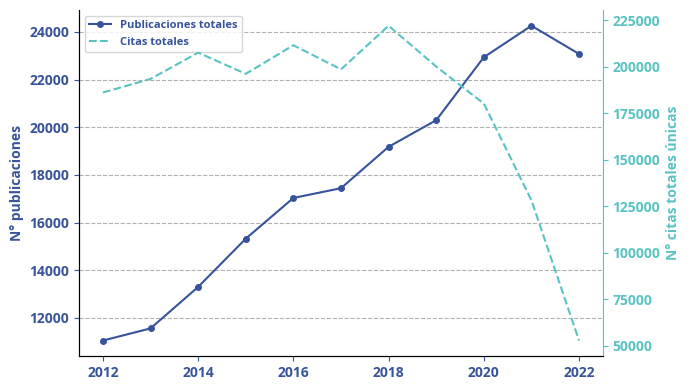

In [71]:
years = list(range(2012,2023))
pubs_totales = [11045, 11555, 13297, 15322, 17031, 17441, 19178, 20295, 22939, 24261, 23077]
citas_totales = [186122, 193429, 207553, 196159, 211519, 198555, 221998, 200066, 180188, 128210, 52847]

fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()
lns1 = ax1.plot(years, pubs_totales, label='Publicaciones totales', markersize=4)
lns2 = ax2.plot(years, citas_totales, '--', color=COLOR_PALETTE[1], label='Citas totales')
#ax1.set_xlabel('Año')
ax1.set_ylabel('N° publicaciones')
ax2.set_ylabel('N° citas totales únicas', color=COLOR_PALETTE[1])
ax2.grid(False)
ax2.spines['right'].set_visible(True)

ax2.xaxis.label.set_color(COLOR_PALETTE[1])
ax2.tick_params(axis='y', colors=COLOR_PALETTE[1])
ax2.spines['right'].set_color(COLOR_PALETTE[1])
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize=8)
plt.tight_layout()
plt.savefig(base_dir + '/pubs_y_citas.png')
plt.savefig(base_dir + '/pubs_y_citas.svg')

plt.show()

### Publicaciones científicas por región

In [40]:
df = pd.read_excel(base_dir+'/pub_index.xlsx', index_col=0)
df.head()

,Macrozona,Investigadores (JCE),Publicaciones indexadas 2018,Publicaciones por JCE de investigadores
Región,,,,
Arica y Parinacota,Macrozona Norte,136,465,3.4
Tarapacá,Macrozona Norte,58,176,3.0
Antofagasta,Macrozona Norte,212,844,4.0
Atacama,Macrozona Norte,52,205,4.0
Coquimbo,Macrozona Centro,144,687,4.8


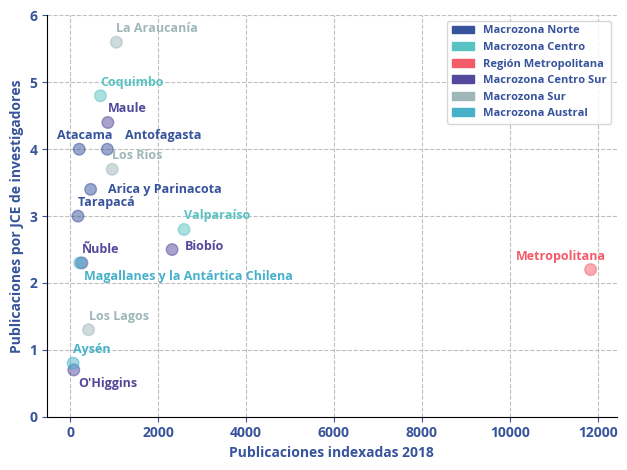

In [41]:
colors = []
for i in df['Macrozona']:
  if i == 'Macrozona Norte':
    colors.append(COLOR_PALETTE[0])
  elif i == 'Macrozona Centro':
    colors.append(COLOR_PALETTE[1])
  elif i == 'RM':
    colors.append(COLOR_PALETTE[2])
  elif i == 'Macrozona Centro Sur':
    colors.append(COLOR_PALETTE[3])
  elif i == 'Macrozona Sur':
    colors.append(COLOR_PALETTE[4])
  elif i == 'Macrozona Austral':
    colors.append(COLOR_PALETTE[7])
  else:
    print('error')
ax = df.plot.scatter('Publicaciones indexadas 2018', 'Publicaciones por JCE de investigadores',
                marker='o', color=colors, s=70, alpha=0.5)
for i in range(len(df)):
  if df.index[i] == 'Atacama':
    ax.annotate(df.index[i], (df['Publicaciones indexadas 2018'][i]-500, df['Publicaciones por JCE de investigadores'][i]+0.15),
                color=colors[i], fontsize=9)
  elif df.index[i] == 'Antofagasta':
    ax.annotate(df.index[i], (df['Publicaciones indexadas 2018'][i]+400, df['Publicaciones por JCE de investigadores'][i]+0.15),
                color=colors[i], fontsize=9)
  elif df.index[i] == 'Arica y Parinacota':
    ax.annotate(df.index[i], (df['Publicaciones indexadas 2018'][i]+400, df['Publicaciones por JCE de investigadores'][i]-0.05),
                color=colors[i], fontsize=9)
  elif df.index[i] == 'Biobío':
    ax.annotate(df.index[i], (df['Publicaciones indexadas 2018'][i]+300, df['Publicaciones por JCE de investigadores'][i]-0.001),
                color=colors[i], fontsize=9)
  elif df.index[i] == 'Magallanes y la Antártica Chilena':
    ax.annotate(df.index[i], (df['Publicaciones indexadas 2018'][i]+100, df['Publicaciones por JCE de investigadores'][i]-0.25),
                color=colors[i], fontsize=9)
  elif df.index[i] == 'O\'Higgins':
    ax.annotate(df.index[i], (df['Publicaciones indexadas 2018'][i]+100, df['Publicaciones por JCE de investigadores'][i]-0.25),
                color=colors[i], fontsize=9)
  elif df.index[i] == 'Metropolitana':
    ax.annotate(df.index[i], (df['Publicaciones indexadas 2018'][i]-1700, df['Publicaciones por JCE de investigadores'][i]+0.15),
                color=colors[i], fontsize=9)
  else:
    ax.annotate(df.index[i], (df['Publicaciones indexadas 2018'][i], df['Publicaciones por JCE de investigadores'][i]+0.15),
                color=colors[i], fontsize=9)

import matplotlib.patches as mpatches
ax.set_ylim((0,6))
norte_patch = mpatches.Patch(color=COLOR_PALETTE[0], label='Macrozona Norte')
centro_patch = mpatches.Patch(color=COLOR_PALETTE[1], label='Macrozona Centro')
rm_patch = mpatches.Patch(color=COLOR_PALETTE[2], label='Región Metropolitana')
centrosur_patch = mpatches.Patch(color=COLOR_PALETTE[3], label='Macrozona Centro Sur')
sur_patch = mpatches.Patch(color=COLOR_PALETTE[4], label='Macrozona Sur')
austral_patch = mpatches.Patch(color=COLOR_PALETTE[7], label='Macrozona Austral')
ax.legend(handles=[norte_patch,centro_patch, rm_patch, centrosur_patch, sur_patch, austral_patch],
          fontsize=8)
ax.grid(axis='both', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.savefig(base_dir + '/pub_index.png')
plt.savefig(base_dir + '/pub_index.svg')
plt.show()

### Evolución de publicaciones y citas por área OCDE  

In [42]:
df = pd.read_excel(base_dir + '/pubs_citas_area_ocde.xlsx', index_col=0)
df.head()

,Ocde Area,Times Cited,Web of Science Documents
Año,,,
2013,Ciencias veterinarias y agrícolas,21856,1467
2013,Ingeniería y tecnología,68440,3159
2013,Artes y humanidades,3864,1594
2013,Ciencias médicas y de la salud,114880,6071
2013,Ciencias naturales,242291,9303


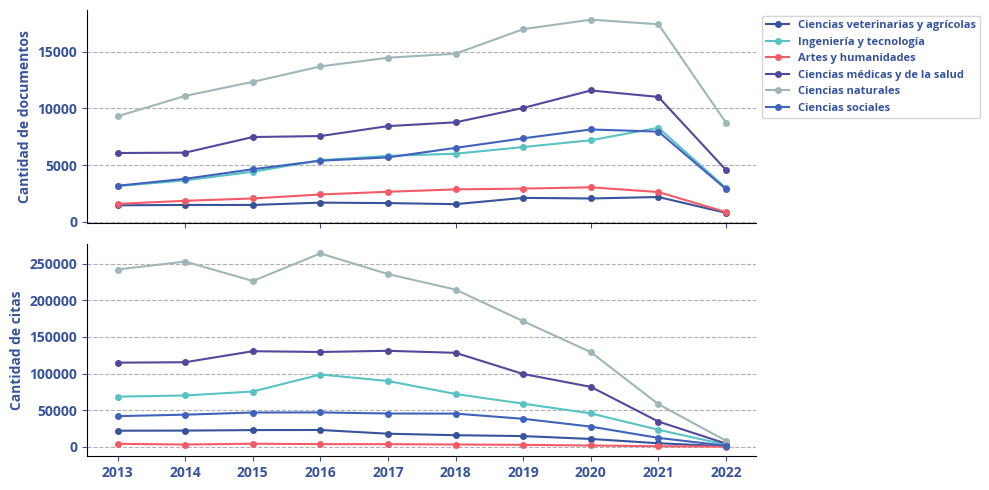

In [43]:
years = df.index.unique()
ocde_areas = df['Ocde Area'].unique()
fig, axs = plt.subplots(2,1,figsize=(10,5))
colors = ['tab:blue', 'tab:orange', 'tab:red', 'tab:cyan', 'tab:green', 'y']
colors = [COLOR_PALETTE[i] for i in range(5)] + [COLOR_PALETTE[6]]
for i in range(len(ocde_areas)):
  axs[0].plot(years, df[df['Ocde Area']==ocde_areas[i]]['Web of Science Documents'],
              'o-', color=colors[i], label=ocde_areas[i], markersize=4)
  axs[1].plot(years, df[df['Ocde Area']==ocde_areas[i]]['Times Cited'],
              'o-', color=colors[i], markersize=4)
axs[0].set_xticklabels([])
axs[1].set_xticks(years)
for i in range(2):
  axs[i].grid(axis='y', linestyle='--')
axs[0].legend(bbox_to_anchor=(1,1), fontsize=8)
#axs[1].spines['top'].set_visible(True)
axs[0].set_ylabel('Cantidad de documentos')
axs[1].set_ylabel('Cantidad de citas')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig(base_dir+'/pubs_citas_area_ocde.png')
plt.savefig(base_dir+'/pubs_citas_area_ocde.svg')
plt.show()

### Publicaciones con colaboración internacional

In [44]:
excel = pd.read_excel(base_dir + '/Prodcientif03.xlsx')
excel.head()

,Año de publicación,Pub Porc Internacional,Publicación Internacional
0,2013,52,4914
1,2014,55,5958
2,2015,56,6804
3,2016,58,7873
4,2017,59,8319


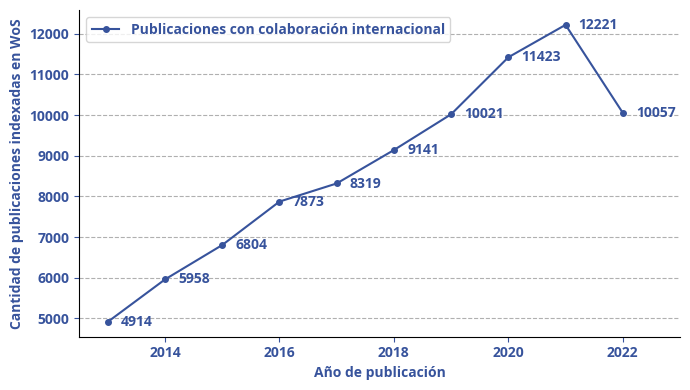

In [45]:
fig, axs = plt.subplots(figsize=(7,4))
ln1 = axs.plot(excel['Año de publicación'], excel['Publicación Internacional'], '-o',
         label='Publicaciones con colaboración internacional', markersize=4)
#axs2 = axs.twinx()
#ln2 = axs2.plot(excel['Año de publicación'], excel['Pub Porc Internacional'], '-o', color='c',
#          label='% de publicaciones con colaboración internacional')


#axs.annotate(str(excel['Publicación Internacional'].iloc[-1]),xy=(excel['Año de publicación'].iloc[-1]+0.1,
#                                                                  excel['Publicación Internacional'].iloc[-1]))
for i in range(len(excel)):
  axs.annotate(str(excel['Publicación Internacional'].iloc[i]), xy=(excel['Año de publicación'].iloc[i]+0.23,
                                                                    excel['Publicación Internacional'].iloc[i]-100))

#axs2.annotate(str(excel['Pub Porc Internacional'].iloc[-1])+'%',xy=(excel['Año de publicación'].iloc[-1]+0.1,
#                                                                excel['Pub Porc Internacional'].iloc[-1]))
axs.set_xlim((2012.5, 2023))
axs.set_xlabel('Año de publicación')
axs.set_ylabel('Cantidad de publicaciones indexadas en WoS')
#axs.set_xticks(excel['Año de publicación'])
#axs2.set_ylabel('% respecto al total de publicaciones chilenas indexadas en Wos')
#lns = ln1 + ln2
#labs = [l.get_label() for l in lns]
#axs.legend(lns, labs)
axs.legend()
plt.tight_layout()
plt.savefig(base_dir + '/colab_internacional.png')
plt.savefig(base_dir + '/colab_internacional.svg')
plt.show()

### Porcentaje publicaciones científicas que involucran colaboración internacional

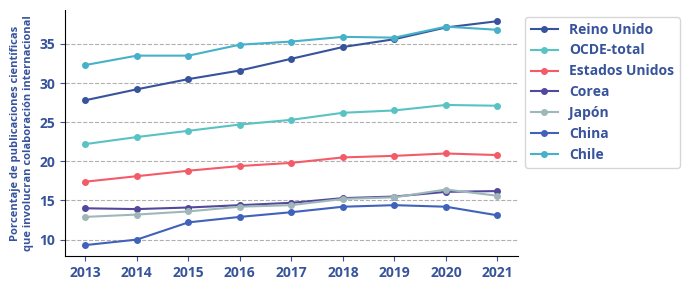

In [46]:
reino_unido = [27.8, 29.2, 30.5, 31.6, 33.1, 34.6, 35.6, 37.1, 37.9]
chile = [32.3, 33.5, 33.5, 34.9, 35.3, 35.9, 35.8, 37.2, 36.8]
OCDE_total = [22.2, 23.1, 23.9, 24.7, 25.3, 26.2, 26.5, 27.2, 27.1]
estados_unidos = [17.4, 18.1, 18.8, 19.4, 19.8, 20.5, 20.7, 21.0, 20.8]
corea = [14, 13.9, 14.1, 14.4, 14.7, 15.3, 15.5, 16.1, 16.2]
japon = [12.9, 13.2, 13.6, 14.2, 14.4, 15.2, 15.4, 16.4, 15.6]
china = [9.3, 10, 12.2, 12.9, 13.5, 14.2, 14.4, 14.2, 13.1]
years = list(range(2013, 2022))
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(years, reino_unido, '-o', label='Reino Unido', #color='tab:orange',
        markersize=4)
ax.plot(years, OCDE_total, '-o', label='OCDE-total', #color='tab:cyan',
        markersize=4)
ax.plot(years, estados_unidos, '-o', label='Estados Unidos', #color='tab:green',
        markersize=4)
ax.plot(years, corea, '-o', label='Corea', #color='y',
        markersize=4)
ax.plot(years, japon, '-o', label='Japón', #color='tab:red',
        markersize=4)
ax.plot(years, china, '-o', label='China', color=COLOR_PALETTE[6],
        markersize=4)
ax.plot(years, chile, '-o', label='Chile', color=COLOR_PALETTE[7],
        markersize=4)
ax.legend(bbox_to_anchor=(1,1))
ax.grid(axis='y', linestyle='--')
ax.set_ylabel('Porcentaje de publicaciones científicas\nque involucran colaboración internacional',
              fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/cientif_pubs_colab_internacional.png')
plt.savefig(base_dir+'/cientif_pubs_colab_internacional.svg')
plt.show()

## Producción Tecnológica

### Patentamiento en Chile (nacionales y extranjeras)

In [47]:
years = np.array(list(range(2013,2023)), dtype='str')

dfs = []

for i in years:
  filename_reg = '/patentes/Registers-{}.xlsx'.format(i)
  dfs.append(pd.read_excel(base_dir +  filename_reg))
len(dfs)

10

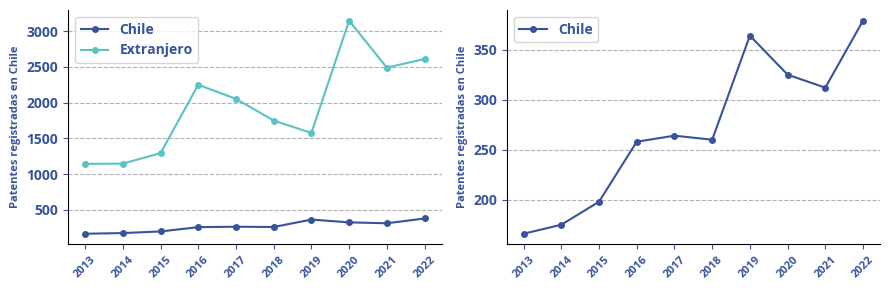

In [48]:
cant_patentes_extranjeras = []
cant_patentes_nacionales = []
for df in dfs:
  cant_patentes_extranjeras.append(len(df[df['Country']!='CHILE']))
  cant_patentes_nacionales.append(len(df[df['Country']=='CHILE']))

fig,axs = plt.subplots(1,2, figsize=(9,3))
axs[0].plot(years, cant_patentes_nacionales, '-o', label='Chile', markersize=4)
axs[0].plot(years, cant_patentes_extranjeras, 'o-', label='Extranjero', markersize=4)
axs[1].plot(years, cant_patentes_nacionales, '-o', label='Chile', markersize=4)
axs[0].legend()
axs[0].grid(axis='y', linestyle='--')
axs[0].set_ylabel('Patentes registradas en Chile', fontsize=8)
axs[1].grid(axis='y', linestyle='--')
axs[1].set_ylabel('Patentes registradas en Chile', fontsize=8)
axs[0].tick_params(axis='x', labelsize=8, labelrotation=45)
axs[1].tick_params(axis='x', labelsize=8, labelrotation=45)
axs[1].legend()
plt.tight_layout()
plt.savefig(base_dir+'/cantidad_patentes.png')
plt.savefig(base_dir+'/cantidad_patentes.svg')
plt.show()

### Evolución de patentes PCT de invención solicitadas en Chile

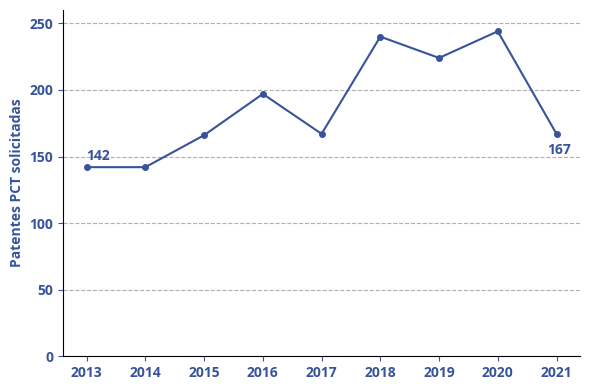

In [49]:
values = [142, 142, 166, 197, 167, 240, 224, 244, 167]
years = list(range(2013, 2022))

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(years, values, '-o', markersize=4)
ax.annotate(values[0], (years[0], values[0]+5))
ax.annotate(values[-1], (years[-1]-0.15, values[-1]-15))
ax.set_ylim((0, 260))
ax.set_ylabel('Patentes PCT solicitadas')
plt.tight_layout()
plt.savefig(base_dir + '/patentes_pct_invencion.png')
plt.savefig(base_dir + '/patentes_pct_invencion.svg')
plt.show()

### Cantidad de solicitudes de patentes PCT por cada millón de habitantes mundialmente

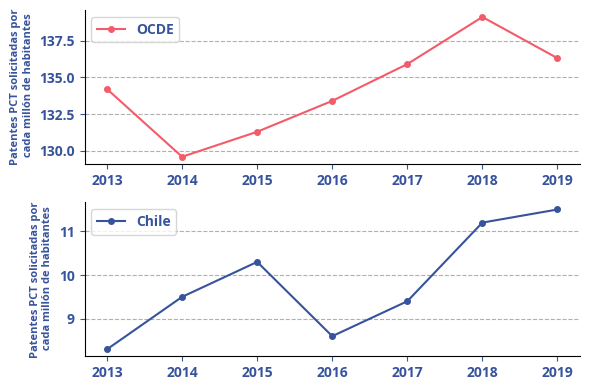

In [50]:
chile = [8.3, 9.5, 10.3, 8.6, 9.4, 11.2, 11.5]
ocde = [134.2, 129.6, 131.3, 133.4, 135.9, 139.1, 136.3]
years = list(range(2013, 2020))

fig, axs = plt.subplots(2,1,figsize=(6,4))
axs[1].plot(years, chile, '-o', markersize=4, label='Chile')
axs[0].plot(years, ocde, '-o', markersize=4, label='OCDE', c=COLOR_PALETTE[2])
axs[0].legend()
axs[1].legend()
axs[0].grid(axis='y', linestyle='--')
axs[1].grid(axis='y', linestyle='--')
axs[0].set_ylabel('Patentes PCT solicitadas por\n cada millón de habitantes', fontsize=8)
axs[1].set_ylabel('Patentes PCT solicitadas por\n cada millón de habitantes', fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/pct_por_millon.png')
plt.savefig(base_dir+'/pct_por_millon.svg')

plt.show()

### Solicitantes residentes en oficinas nacionales de patentes, países seleccionados

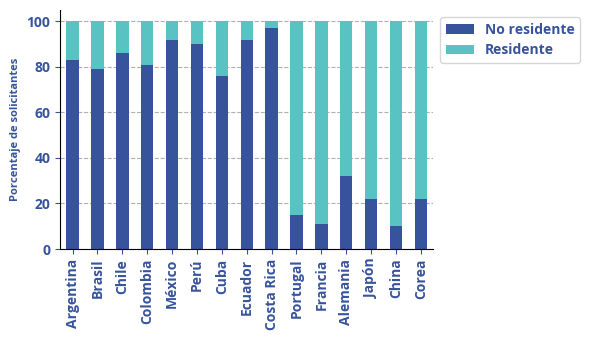

In [51]:
no_residente = [83, 79, 86, 81, 92, 90, 76, 92, 97, 15, 11, 32, 22, 10, 22]
paises = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'México', 'Perú', 'Cuba', 'Ecuador', 'Costa Rica',
          'Portugal', 'Francia', 'Alemania', 'Japón', 'China', 'Corea']

data = dict()
for i in range(len(paises)):
  data[paises[i]] = [no_residente[i], 100-no_residente[i]]
df = pd.DataFrame(data, index=['No residente', 'Residente']).T

fig, ax = plt.subplots(figsize=(6,3.5))
df.plot.bar(stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('Porcentaje de solicitantes', fontsize=8)
ax.grid(axis='y', linestyle='--')
ax.grid(False, axis='x')
plt.tight_layout()
plt.savefig(base_dir + '/solicitantes_residentes_en_oficinas_nacionales_de_patentes.png')
plt.savefig(base_dir + '/solicitantes_residentes_en_oficinas_nacionales_de_patentes.svg')
plt.show()

### Solicitudes de patentes de invención y modelos de utilidad por parte de universidades chilenas

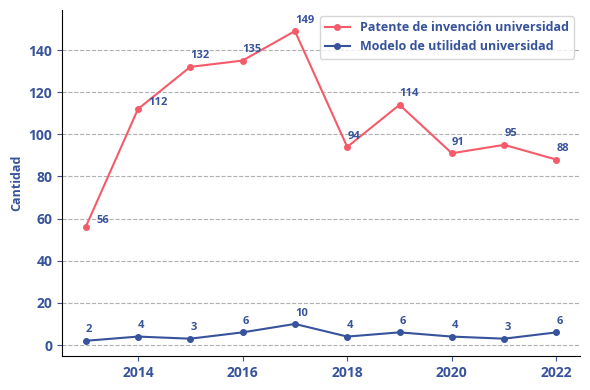

In [52]:
year = list(range(2013, 2023))
patente_inv_universid = [56, 112, 132, 135, 149, 94, 114, 91, 95, 88]
mod_utilidad_universid = [2, 4, 3, 6, 10, 4, 6, 4, 3, 6]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(year, patente_inv_universid, '-o', markersize=4,
        color=COLOR_PALETTE[2], label= 'Patente de invención universidad')
ax.plot(year, mod_utilidad_universid, '-o', markersize=4,
        label= 'Modelo de utilidad universidad')
ax.grid(axis='y', linestyle='--')
ax.set_ylabel('Cantidad', fontsize=9)
ax.legend(fontsize=9, loc=0)
for i in range(len(year)):
  if i == 0 or i == 1:
    ax.annotate(patente_inv_universid[i], (year[i]+0.2, patente_inv_universid[i]+2), fontsize=8)
  else:
    ax.annotate(patente_inv_universid[i], (year[i], patente_inv_universid[i]+4), fontsize=8)
  ax.annotate(mod_utilidad_universid[i], (year[i], mod_utilidad_universid[i]+4), fontsize=8)
ax.set_ylim(top=159)
plt.tight_layout()
plt.savefig(base_dir+'/solic_patentes_invencion_y_modelos_utilid_universid.png')
plt.savefig(base_dir+'/solic_patentes_invencion_y_modelos_utilid_universid.svg')
plt.show()

### Número de divulgaciones de invención y el número de licenciamientos gestionados por Oficinas de Transferencia y Licenciamiento (OTL)


In [53]:
dfs = []
for i in range(15,20):
  df = pd.read_excel(base_dir+'/otl_20{}.xlsx'.format(i),index_col=0)
  df = df.iloc[::-1]
  df = df.T
  df = df.rename(index={'Divulgaciones de invención': 'Divulgaciones\nde invención'})
  dfs.append(df)
dfs[0].head()

Tipo de institución,Institutos Tecnológicos Públicos,Privadas,Estatales Cruch,Privadas Cruch
Divulgaciones\nde invención,5,52,99,154
Licencias,1,3,27,19


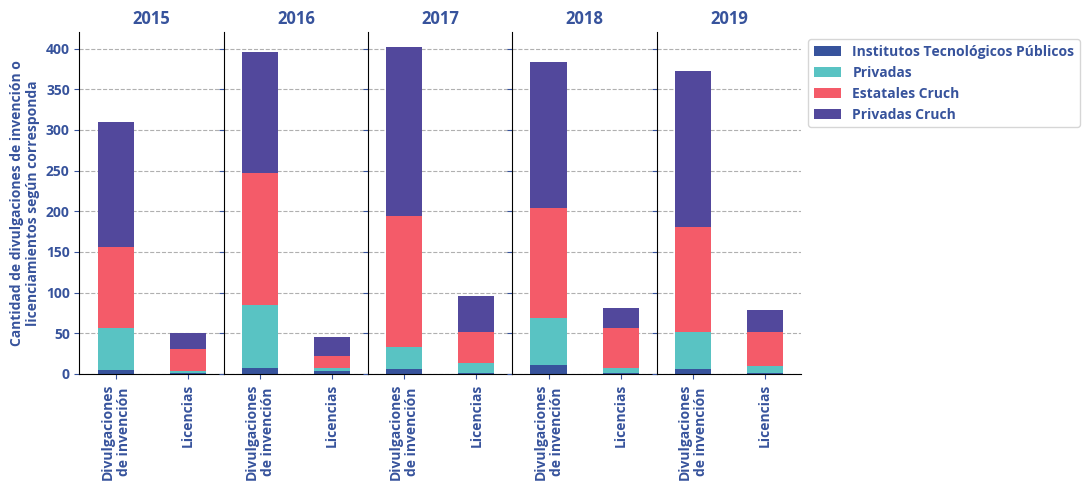

In [54]:
fig, axs = plt.subplots(1,5, figsize=(11,5))
for i in range(5):
  dfs[i].plot.bar(stacked=True, ax=axs[i], legend=False)
  axs[i].set_ylim((0,420))
  axs[i].grid(axis='y', linestyle='--')
  axs[i].grid(False, axis='x')
  if i != 0:
    axs[i].set_yticklabels([])
  if i == 4:
    axs[i].legend(bbox_to_anchor=(1,1))
  axs[i].set_title('20{}'.format(15+i))
axs[0].set_ylabel('Cantidad de divulgaciones de invención o\nlicenciamientos según corresponda')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(base_dir+'/otls_.png')
plt.savefig(base_dir+'/otls_.svg')

### Número de spin-offs y start-ups creadas con apoyo de OTL

In [55]:
dfs = []
for i in range(15,20):
  df = pd.read_excel(base_dir+'/spinoff_startups_20{}.xlsx'.format(i),index_col=0)
  df = df.iloc[::-1]
  df = df.T
  dfs.append(df)
dfs[0].head()

Tipo de instituciones,Institutos Tecnológicos Públicos,Privadas,Estatales Cruch,Privadas Cruch
Spin-off,0,0,2,3
Start-up,0,2,26,11


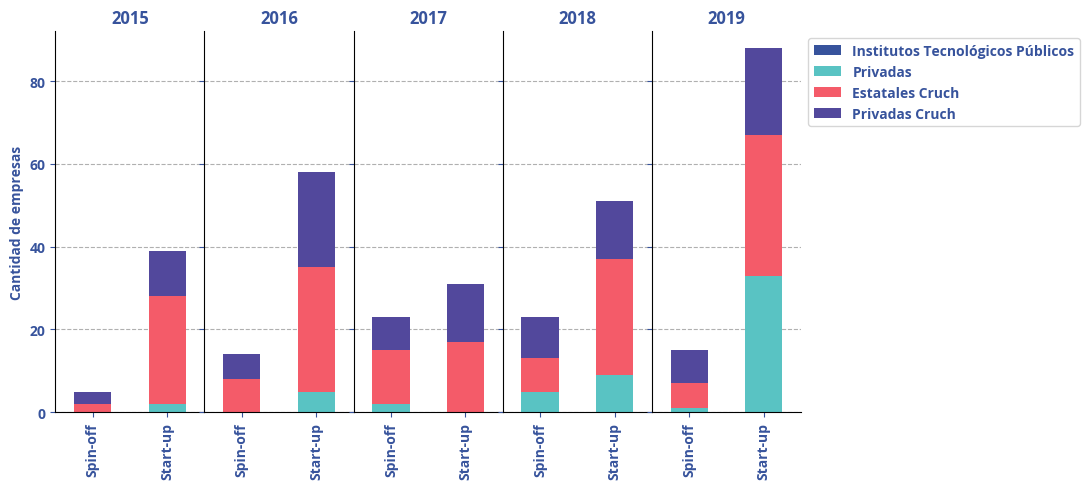

In [56]:
fig, axs = plt.subplots(1,5, figsize=(11,5))
for i in range(5):
  dfs[i].plot.bar(stacked=True, ax=axs[i], legend=False)
  axs[i].set_ylim((0,92))
  axs[i].grid(False, axis='x')
  axs[i].grid(axis='y', linestyle='--')
  if i != 0:
    axs[i].set_yticklabels([])
  if i == 4:
    axs[i].legend(bbox_to_anchor=(1,1))
  axs[i].set_title('20{}'.format(15+i))
axs[0].set_ylabel('Cantidad de empresas')
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(base_dir+'/spinoff_startups.png')
plt.savefig(base_dir+'/spinoff_startups.svg')

## Ciencia y Sociedad

### Interés en áreas del conocimiento

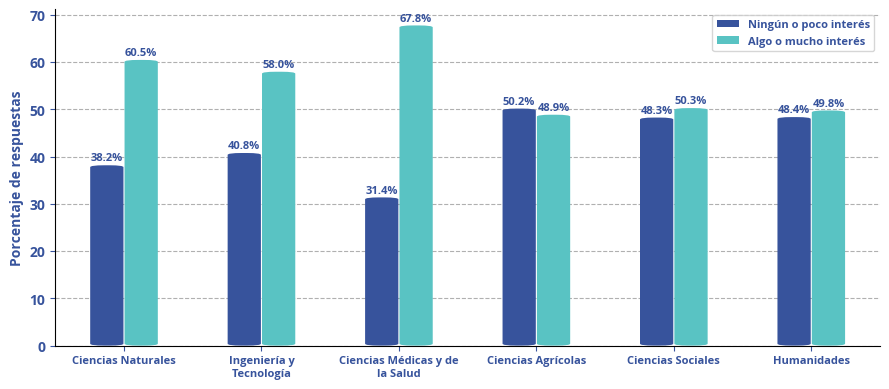

In [57]:
df = pd.DataFrame({'Ciencias Naturales': [38.2, 60.5], 'Ingeniería y\nTecnología': [40.8, 58.0], 'Ciencias Médicas y de\nla Salud': [31.4, 67.8],
                   'Ciencias Agrícolas':[50.2, 48.9], 'Ciencias Sociales': [48.3, 50.3], 'Humanidades': [48.4, 49.8]},
                  index=['Ningún o poco interés', 'Algo o mucho interés']).T
fig, ax = plt.subplots(figsize=(9,4))
df.plot.bar(ax=ax, width=0.5)
ax.tick_params(axis='x', labelsize=8, rotation=0)
ax.bar_label(ax.containers[0], fontsize=8, fmt='%.1f%%', padding=1)
ax.bar_label(ax.containers[1], fontsize=8, fmt='%.1f%%', padding=1)
ax.legend(fontsize=8)
ax.grid(axis='y',linestyle='--')
ax.grid(False, axis='x')
ax.set_ylabel('Porcentaje de respuestas')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/interes_area_conocim.png')
plt.savefig(base_dir+'/interes_area_conocim.svg')
plt.show()

### Valoración del desarrollo científico y su impacto en la sociedad

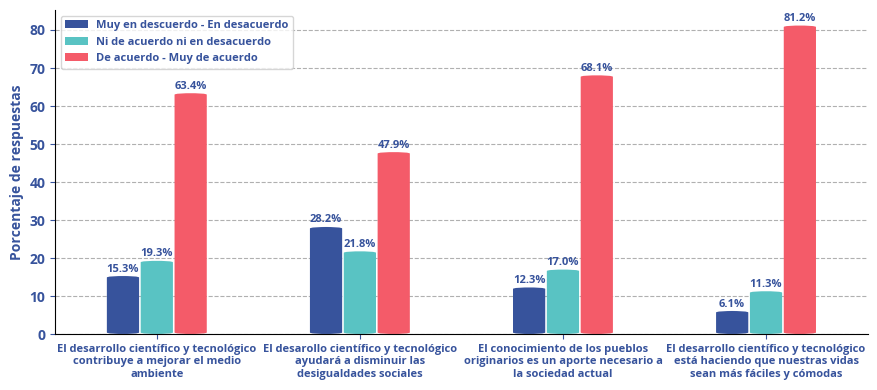

In [58]:
df = pd.DataFrame({'El desarrollo científico y tecnológico\ncontribuye a mejorar el medio\nambiente':[15.3, 19.3, 63.4],
                   'El desarollo científico y tecnológico\nayudará a disminuir las\ndesigualdades sociales':[28.2, 21.8,47.9],
                   'El conocimiento de los pueblos\noriginarios es un aporte necesario a\nla sociedad actual': [12.3, 17.0, 68.1],
                   'El desarrollo científico y tecnológico\nestá haciendo que nuestras vidas\nsean más fáciles y cómodas': [6.1, 11.3, 81.2]},
                  index=['Muy en descuerdo - En desacuerdo', 'Ni de acuerdo ni en desacuerdo', 'De acuerdo - Muy de acuerdo']).T
fig, ax = plt.subplots(figsize=(9,4))
df.plot.bar(ax=ax, width=0.5)
ax.tick_params(axis='x', labelsize=8, rotation=0)
ax.bar_label(ax.containers[0], fontsize=8, fmt='%.1f%%', padding=1)
ax.bar_label(ax.containers[1], fontsize=8, fmt='%.1f%%', padding=1)
ax.bar_label(ax.containers[2], fontsize=8, fmt='%.1f%%', padding=1)
ax.legend(fontsize=8)
round_corners(ax)
ax.grid(False, axis='x')
ax.grid(axis='y',linestyle='--')
ax.set_ylabel('Porcentaje de respuestas')
plt.tight_layout()
plt.savefig(base_dir+'/valor_cientific_impacto_sociedad.png')
plt.savefig(base_dir+'/valor_cientific_impacto_sociedad.svg')
plt.show()

### Consumo científico

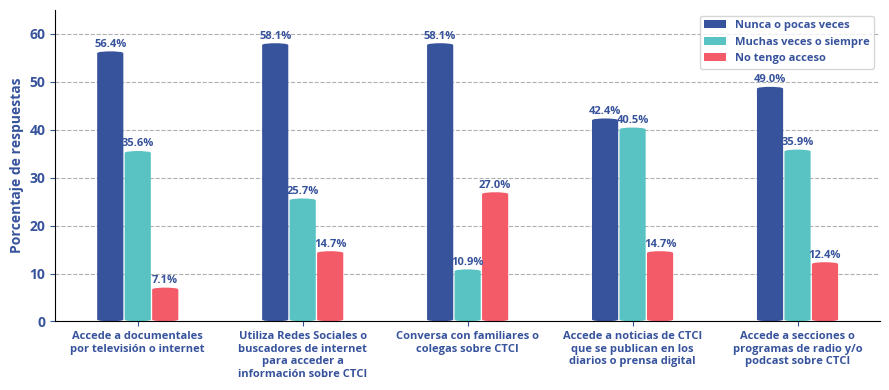

In [59]:
df = pd.DataFrame({'Accede a documentales\npor televisión o internet': [56.4, 35.6, 7.1],
                   'Utiliza Redes Sociales o\nbuscadores de internet\npara acceder a\ninformación sobre CTCI': [58.1, 25.7, 14.7],
                   'Conversa con familiares o\ncolegas sobre CTCI': [58.1, 10.9, 27.0],
                   'Accede a noticias de CTCI\nque se publican en los\ndiarios o prensa digital':[42.4, 40.5, 14.7],
                   'Accede a secciones o\nprogramas de radio y/o\npodcast sobre CTCI': [49.0, 35.9, 12.4]},
                  index=['Nunca o pocas veces', 'Muchas veces o siempre', 'No tengo acceso']).T
fig, ax = plt.subplots(figsize=(9,4))
df.plot.bar(ax=ax, width=0.5)
ax.tick_params(axis='x', labelsize=8, rotation=0)
ax.bar_label(ax.containers[0], fontsize=8, fmt='%.1f%%', padding=1)
ax.bar_label(ax.containers[1], fontsize=8, fmt='%.1f%%', padding=1)
ax.bar_label(ax.containers[2], fontsize=8, fmt='%.1f%%', padding=1)
ax.legend(fontsize=8)
ax.set_ylim(top=65)
round_corners(ax)
ax.grid(False, axis='x')
ax.grid(axis='y',linestyle='--')
ax.set_ylabel('Porcentaje de respuestas')
plt.tight_layout()
plt.savefig(base_dir+'/consumo_cientif.png')
plt.savefig(base_dir+'/consumo_cientif.svg')
plt.show()

### Evolución PISA Rendimiento medio en Ciencias

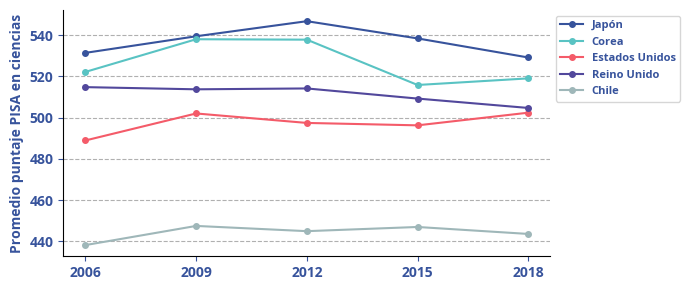

In [60]:
years = [2006, 2009, 2012, 2015, 2018]
japon = [531.39,539.43,546.74,538.39,529.14]
corea = [522.15, 537.99, 537.79, 515.81, 519.01]
eeuu = [488.91, 502.00, 497.41, 496.24, 502.38]
uk=[514.77, 513.71, 514.13, 509.22, 504.67]
chile=[438.18, 447.47, 444.93, 446.96, 443.58]
plt.figure(figsize=(7,3))
plt.plot(years, japon, '-o', label='Japón', markersize=4)
plt.plot(years, corea, '-o', label='Corea', markersize=4)
plt.plot(years, eeuu, '-o', label='Estados Unidos', markersize=4)
plt.plot(years, uk, '-o', label='Reino Unido', markersize=4)
plt.plot(years, chile, '-o', label='Chile', markersize=4)
plt.grid(axis='y', linestyle='--')
plt.ylabel('Promedio puntaje PISA en ciencias')
plt.legend(fontsize=8, bbox_to_anchor=(1,1))
plt.xticks(years)
plt.tight_layout()
plt.savefig(base_dir +'/pisa.png')
plt.savefig(base_dir +'/pisa.svg')

### Porcentaje de adultos con bajas habilidades en TIC y procesamiento de información, Chile y resto de países OCDE

In [61]:
df = pd.read_excel(base_dir + '/low_skills_tic_info_process.xlsx', index_col=0)
df.head()

,Porcentaje
Australia,0.8235
Austria,1.0764
Canadá,1.0418
Chile,8.0320
República Checa,0.5420


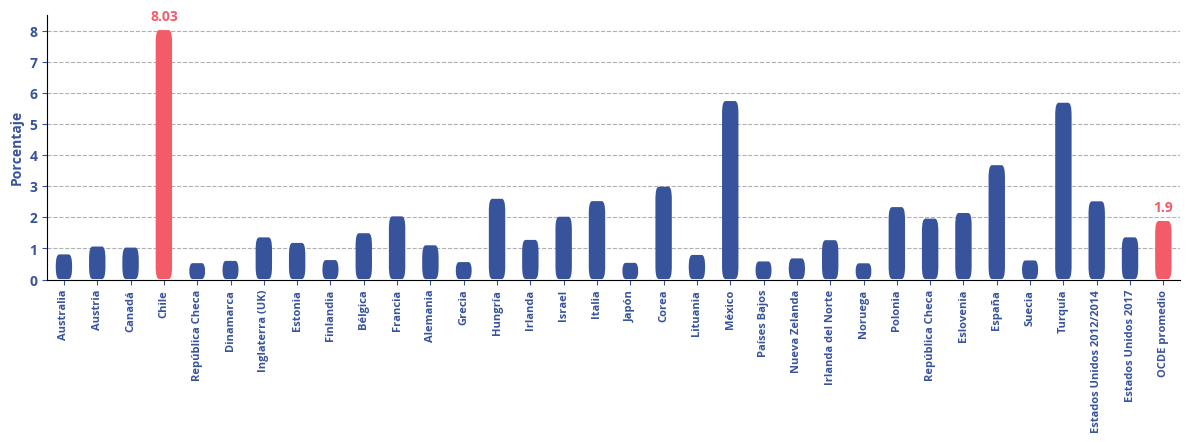

In [62]:
fig, ax = plt.subplots(figsize=(12,4.5))
df.plot.bar(ax=ax, legend=False)
ax.grid(axis='y', linestyle='--')
ax.tick_params(axis='x', labelsize=8)
ax.set_ylabel('Porcentaje')

ax.get_children()[3].set_color(COLOR_PALETTE[2])
ax.get_children()[33].set_color(COLOR_PALETTE[2])
rects = ax.patches
for index, rect in enumerate(rects):
    if index in [3, 33]:
        height = np.round(rect.get_height(),2)
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.2, height,
                ha='center', va='bottom', color=COLOR_PALETTE[2])
ax.grid(False, axis='x')
round_corners(ax)
ax.set_ylim(top=8.5)
#barlabels[3].set_font_properties({'weight':'semibold'})
#barlabels[35].set_font_properties({'weight':'semibold'})
plt.tight_layout()
plt.savefig(base_dir+'/low_skills_tic_info_process.png')
plt.savefig(base_dir+'/low_skills_tic_info_process.svg')

### Evolución de la intención emprendedora en Chile, 18-64 años

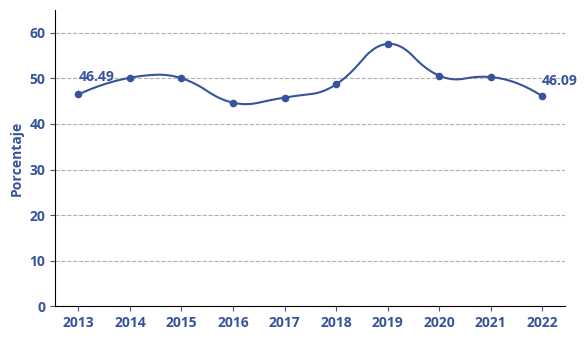

In [63]:
from scipy.interpolate import make_interp_spline
values = [46.49, 50.14, 50.03, 44.66, 45.78, 48.67, 57.57, 50.6, 50.29, 46.09]
years = np.array(list(range(2013, 2023)))

X_Y_Spline = make_interp_spline(years, values, k=2)

# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(years.min(), years.max(), 500)
Y_ = X_Y_Spline(X_)
fig, ax = plt.subplots(figsize=(6,3.5))
ax.plot(X_, Y_, '-')#,markersize=4)
ax.scatter(years, values, s=20)
ax.grid(axis='y',linestyle='--')
ax.annotate(values[0], (years[0], values[0]+2.9))#, fontsize=8)
ax.annotate(values[-1], (years[-1], values[-1]+2.5))#, fontsize=8)
ax.set_ylabel('Porcentaje')
ax.set_xticks(years)
ax.set_ylim((0, 65))
plt.tight_layout()
plt.savefig(base_dir+'/intencion_emprendedora.png')
plt.savefig(base_dir+'/intencion_emprendedora.svg')
plt.show()

## Empresas y Emprendimientos de Base Científico-Tecnológica (EBCT)

### EBCT según tipo de tecnología predominante

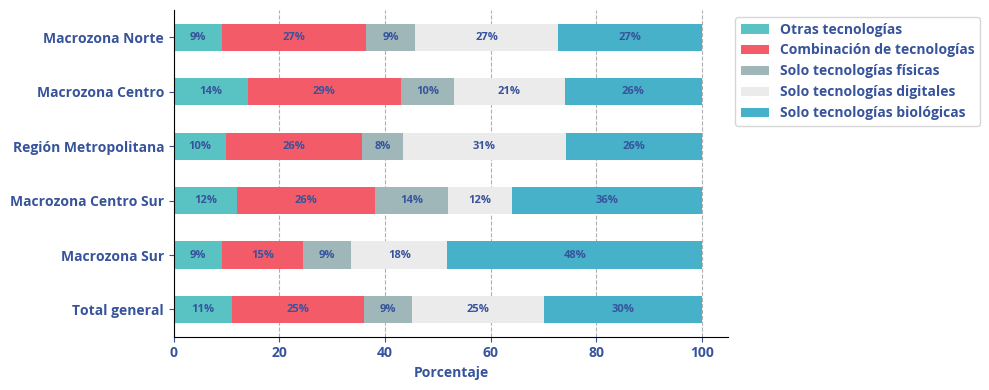

In [64]:
df = pd.DataFrame({'Macrozona Norte': [9.2, 27.2, 9.2, 27.2, 27.2],
                   'Macrozona Centro': [14, 29, 10, 21, 26],
                   'Región Metropolitana': [9.8, 25.8, 7.8, 30.8, 25.8],
                   'Macrozona Centro Sur': [12, 26, 14, 12, 36],
                   'Macrozona Sur': [9.2, 15.2, 9.2, 18.2, 48.2],
                   'Total general': [11, 25, 9, 25, 30]},
                  index=['Otras tecnologías', 'Combinación de tecnologías',
                         'Solo tecnologías físicas', 'Solo tecnologías digitales',
                         'Solo tecnologías biológicas']).T
df = df.loc[::-1]
fig, ax = plt.subplots(figsize=(10,4))
df.plot.barh(stacked=True, ax= ax, color=[COLOR_PALETTE[1], COLOR_PALETTE[2],
             COLOR_PALETTE[4], COLOR_PALETTE[5], COLOR_PALETTE[7]])
ax.legend(bbox_to_anchor=(1,1))
for i in range(len(df.columns)):
  ax.bar_label(ax.containers[i], label_type='center', fontsize=8, fmt='%.0f%%')
ax.set_xlabel('Porcentaje')
ax.grid(False, axis='y')
plt.tight_layout()
plt.savefig(base_dir+'/ebct_tipo_tecnologia.png')
plt.savefig(base_dir+'/ebct_tipo_tecnologia.svg')
plt.show()

### Origen idea en que se basan EBCT , según tecnología predominante

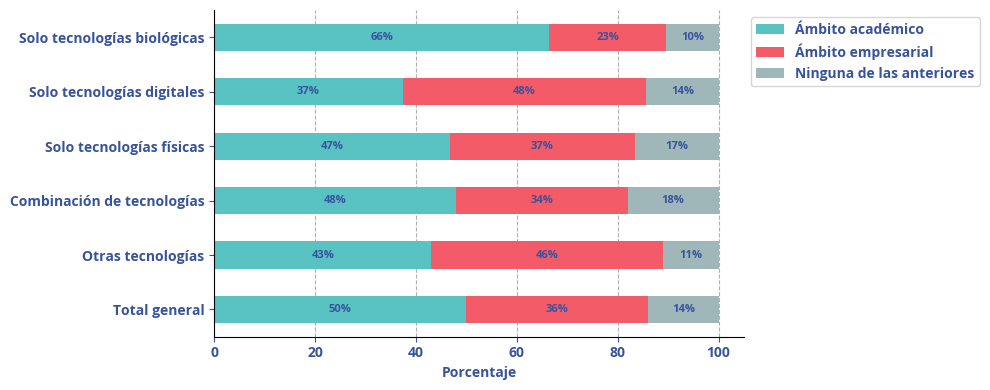

In [65]:
df = pd.DataFrame({'Solo tecnologías biológicas': [66.3333, 23.3333, 10.3333],
                   'Solo tecnologías digitales': [37.3333, 48.3333, 14.3333],
                   'Solo tecnologías físicas': [46.6667, 36.6667, 16.6667],
                   'Combinación de tecnologías': [48, 34, 18],
                   'Otras tecnologías': [43, 46, 11],
                   'Total general': [50, 36, 14]}, index=[
                       'Ámbito académico', 'Ámbito empresarial', 'Ninguna de las anteriores'
                   ]).T
df = df.loc[::-1]
fig, ax = plt.subplots(figsize=(10,4))
df.plot.barh(stacked=True, ax= ax, color=[COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[4]])
ax.legend(bbox_to_anchor=(1,1))
for i in range(len(df.columns)):
  ax.bar_label(ax.containers[i], label_type='center', fontsize=8, fmt='%.0f%%')
ax.set_xlabel('Porcentaje')
ax.grid(False, axis='y')
plt.tight_layout()
plt.savefig(base_dir+'/idea_ebct_segun_tecnologia.png')
plt.savefig(base_dir+'/idea_ebct_segun_tecnologia.svg')
plt.show()
